##  <span style='background :#96e773' > 1. Introduction </span>

XXX

In [1]:
# Importation des librairies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sys
import statsmodels.api as sm
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Versions
print('Version des librairies utilisées:')
print('Python ' + sys.version)
print('Pandas ' + pd.__version__)
print('NumPy ' + np.__version__)
print('Seaborn ' + sns.__version__)
print('Matplotlib ' + matplotlib.__version__)
print('Sklearn ' + sklearn.__version__)

Version des librairies utilisées:
Python 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
Pandas 1.5.2
NumPy 1.23.5
Seaborn 0.12.2
Matplotlib 3.5.3
Sklearn 1.2.2


In [2]:
from matplotlib import rcParams

# Définition des tailles de polices des figures


SMALL_SIZE = 15
MEDIUM_SIZE = 16
BIGGER_SIZE = 17

plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('axes', titlesize=BIGGER_SIZE)

rcParams['axes.titlepad'] = 20
plt.rcParams['figure.dpi'] = 100

sns.set(style="darkgrid")

**Fonctions**

In [3]:
def dim(df):
    x, y = df.shape
    print(f'Le jeu de données contient {x} lignes et {y} colonnes.')

In [4]:
def missing_values(df):
    a = df.isna().sum().sum()
    b = round(df.isna().mean().mean() * 100)
    print(f'Le jeu de données contient {a} valeurs manquantes ({b}%).')

In [5]:
def recap_missing_values(df):
    df = pd.DataFrame(df)
    a = df.notna().sum()
    b = df.isna().sum()
    c = round((1 - df.isna().mean()) * 100, 2)
    d = pd.concat([a, b, c], axis=1).reset_index()
    d.columns = ['Variable',
                 'Nombre de valeurs renseignées',
                 'Nombre de valeurs manquantes',
                 'Taux de remplissage (%)']
    return d

In [6]:
# Distribution empirique

def distri(df, col, xlim=None, line=True, kde=True, log=False):
    sns.set(style="darkgrid")

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    # noinspection PyTypeChecker
    g, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(7, 5))

    # assigning a graph to each ax
    sns.boxplot(x=df[col], ax=ax_box)
    sns.histplot(x=df[col], ax=ax_hist, kde=kde)

    # Remove x-axis name for the boxplot
    ax_box.set(xlabel='')

    mean = round(df[col].mean(), 2)
    median = round(df[col].median(), 2)
    std = round(df[col].std(ddof=0), 2)
    c_var = round(std / mean, 2)
    skew = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)

    mean_text = "mean = " + str(mean)
    median_text = "median = " + str(median)
    std_text = "std = " + str(std)
    c_var_text = "coeff var = " + str(c_var)
    skew_text = "skew = " + str(skew)
    kurtosis_text = "kurtosis = " + str(kurtosis)

    plt.text(0.75, 0.4,
             mean_text + "\n" + median_text + "\n" + std_text + "\n" + c_var_text + "\n" + skew_text + "\n" + kurtosis_text,
             fontsize=12, color='k',
             ha='left', va='bottom',
             transform=plt.gca().transAxes)

    if line:

        ax_hist.axvline(mean, color='red', linestyle='--', linewidth="2", label="mean")
        ax_hist.axvline(median, color='mediumblue', linestyle='-.', linewidth="2", label="median")
        plt.legend()
    else:
        pass

    if log:
        ax_hist.set_yscale('log')
    else:
        pass

    if xlim:
        plt.xlim(xlim)

    plt.show()

In [7]:
# Distribution empirique et QQ plot

def distri_qq(df, col, line=True, log=False):
    sns.set(style="darkgrid")

    df = df.dropna(subset=col)

    gs_kw = dict(width_ratios=[1, 0.8], height_ratios=[.15, .85])

    fig, axd = plt.subplot_mosaic([['upper left', 'right'],
                                   ['lower left', 'right']],
                                  gridspec_kw=gs_kw, figsize=(12, 5),
                                  layout="constrained")

    sns.boxplot(x=df[col], ax=axd['upper left'])
    sns.histplot(x=df[col], kde=True, ax=axd['lower left'])
    sm.qqplot(df[col], line="s", ax=axd['right'])

    axd['upper left'].set(xlabel='')
    axd['upper left'].grid(True)
    axd['upper left'].set_xticklabels([])

    mean = round(df[col].mean(), 2)
    median = round(df[col].median(), 2)
    std = round(df[col].std(ddof=0), 2)
    c_var = round(std / mean, 2)
    skew = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)

    mean_text = "mean = " + str(mean)
    median_text = "median = " + str(median)
    std_text = "std = " + str(std)
    c_var_text = "coeff var = " + str(c_var)
    skew_text = "skew = " + str(skew)
    kurtosis_text = "kurtosis = " + str(kurtosis)

    plt.text(0.75, 0.5,
             mean_text + "\n" + median_text + "\n" + std_text + "\n" + c_var_text + "\n" + skew_text + "\n" + kurtosis_text,
             fontsize=12, color='k',
             ha='left', va='bottom',
             transform=plt.gca().transAxes)

    if line:

        axd['lower left'].axvline(mean, color='red', linestyle='--', linewidth="2", label="mean")
        axd['lower left'].axvline(median, color='mediumblue', linestyle='-.', linewidth="2", label="median")
        plt.legend()

    else:
        pass

    if log:
        axd['lower left'].set_yscale('log')
    else:
        pass

    plt.show()

In [8]:
def pie(df, col, titre, explode=True):
    plt.title(titre)

    nbr = df[col].value_counts().sort_index()

    if explode:
        explode = [0.1]
        for i in range(len(nbr) - 1):
            explode.append(0)
    else:
        explode = [0]
        for i in range(len(nbr) - 1):
            explode.append(0)

    plt.pie(nbr, explode=explode, labels=nbr.index, autopct='%1.1f%%',
            textprops={'fontsize': 14, 'color': 'black', 'backgroundcolor': 'w'}, startangle=90)

    plt.axis('equal')
    plt.show()

In [9]:
def distri_ordinale(df, col, titre, figsize, rotation=False):
    fig, (ax_bar, ax_pie) = plt.subplots(1, 2, figsize=figsize)

    order = df[col].value_counts().sort_index().index

    sns.countplot(data=df, x=col, order=order, ax=ax_bar)

    nbr = df[col].sort_values().value_counts().sort_index()

    explode = [0.1]
    for i in range(len(nbr) - 1):
        explode.append(0)

    ax_pie.pie(nbr, explode=explode, labels=nbr.index, autopct='%1.1f%%',
               textprops={'fontsize': 14, 'color': 'black', 'backgroundcolor': 'w'}, startangle=90)

    plt.axis('equal')
    if rotation:
        ax_bar.tick_params(axis='x', rotation=20)

    else:
        pass

    fig.suptitle(titre)
    plt.show()

In [10]:
def stacked_bar(df, x_var, y_var, figsize, text_color, colors):
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).sort_index().unstack()
    df_grouped = df_grouped.fillna(0)
    # display(df_grouped)

    ax = df_grouped.plot.barh(stacked=True, color=colors, figsize=figsize)

    plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=df_grouped.shape[1] + 1,
        fontsize=12,
        title=str(y_var),
        title_fontsize=12
    )

    for ix, row in df_grouped.reset_index(drop=True).iterrows():

        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(cumulative + element / 2, ix, f"{int(element * 100)} %", va="center", ha="center", fontsize=12,
                         color=text_color, weight='bold')
            cumulative += element

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

In [11]:
def kdeplot(df, col, hue, color, figsize):
    sns.set(style="whitegrid")
    plt.figure(figsize=figsize)

    sns.kdeplot(x=df[col], hue=df[hue], common_norm=False, palette=color, linewidth=2)

    plt.show()

In [12]:
def correlation_graph(pca,
                      x_y,
                      features):
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x, y = x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):
        # Les flèches
        ax.arrow(0, 0,
                 pca.components_[x, i],
                 pca.components_[y, i],
                 head_width=0.07,
                 head_length=0.07,
                 width=0.02, length_includes_head=True)

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                 pca.components_[y, i],
                 features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x + 1, round(100 * pca.explained_variance_ratio_[x], 1)))
    plt.ylabel('PC{} ({}%)'.format(y + 1, round(100 * pca.explained_variance_ratio_[y], 1)))

    plt.title("Cercle des corrélations (PC{} et PC{})".format(x + 1, y + 1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [13]:
def display_factorial_planes(X_projected,
                             x_y,
                             pca=None,
                             labels=None,
                             clusters=None,
                             c_dict=None,
                             alpha=0.5,
                             figsize=(10, 8),
                             marker="."):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en un df
    X_ = pd.DataFrame(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7, 6)

    # On vérifie la variable axis
    if not len(x_y) == 2:
        raise AttributeError("2 axes sont demandées")
    if max(x_y) >= X_.shape[1]:
        raise AttributeError("la variable axis n'est pas bonne")

    # On définit x et y
    x = x_y[0]
    y = x_y[1]

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On rajoute la color, les clusters et les labels à X_
    X_["clusters"] = clusters if clusters is not None else "None"
    X_["labels"] = labels

    # c_dict = {'a':'#00803d', 'b': '#86bc25', 'c':'#ffcc00', 'd':'#ef7d00', 'e':'#e53312'}
    # colors_nutri = ['#00803d', '#86bc25', '#ffcc00', '#ef7d00', '#e53312']

    if c_dict is None:
        c_unique_list = X_["clusters"].sort_values().unique()
        c_dict = {j: i + 1 for i, j in enumerate(c_unique_list)}

    X_["colors"] = X_["clusters"].apply(lambda i: c_dict[i])

    # Pour chaque couleur / cluster
    for c in sorted(X_.clusters.unique()):
        # On sélectionne le sous DF
        sub_X = X_.loc[X_.clusters == c, :]

        # Clusters and color
        cluster = sub_X.clusters.iloc[0]
        color = sub_X.colors.iloc[0]

        if clusters is None:

            ax.scatter(sub_X.iloc[:, x],
                       sub_X.iloc[:, y],
                       alpha=alpha,
                       label=cluster,
                       marker=marker)

        else:

            ax.scatter(sub_X.iloc[:, x],
                       sub_X.iloc[:, y],
                       alpha=alpha,
                       label=cluster,
                       color=color,
                       marker=marker)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca:
        v1 = str(round(100 * pca.explained_variance_ratio_[x])) + " %"
        v2 = str(round(100 * pca.explained_variance_ratio_[y])) + " %"
    else:
        v1 = v2 = ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x + 1} {v1}')
    ax.set_ylabel(f'PC{y + 1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_.iloc[:, x]).max() * 1.1
    y_max = np.abs(X_.iloc[:, y]).max() * 1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom=-y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0, 0], [-y_max, y_max], color='grey', alpha=0.8)

    if labels is not None:
        for i, (x, y) in enumerate(X_projected[:, [x, y]]):
            ax.text(x, y + 0.05, labels[i], fontsize='11', ha='center', va='center')

    # Titre, legend et display
    plt.title(f"Projection des individus (sur PC{x + 1} et PC{y + 1})")
    if clusters is not None:
        plt.legend()
    plt.show()

In [14]:
def return_row_max(df, col):
    row_max = df[df[col] == df[col].max()]

    return row_max

In [15]:
def return_row_min(df, col):
    row_min = df[df[col] == df[col].min()]

    return row_min

In [16]:
def outliers_iqr(df, col):
    q1 = df[col].quantile(0.25)

    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    outliers = df[((df[col] < (q1 - 1.5 * iqr)) | (df[col] > (q3 + 1.5 * iqr)))].sort_values(by=col, ascending=False)

    return outliers

In [17]:
def getDuplicateColumns(df):
    # Create an empty set
    duplicateColumnNames = set()

    # Iterate through all the columns
    # of dataframe
    for x in range(df.shape[1]):

        # Take column at xth index.
        col = df.iloc[:, x]

        # Iterate through all the columns in
        # DataFrame from (x + 1)th index to
        # last index
        for y in range(x + 1, df.shape[1]):

            # Take column at yth index.
            otherCol = df.iloc[:, y]

            # Check if two columns at x & y
            # index are equal or not,
            # if equal then adding
            # to the set
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])

    # Return list of unique column names
    # whose contents are duplicates.
    return list(duplicateColumnNames)

In [18]:
def period(df, col):
    debut = df[col].min().strftime('%d/%m/%Y')
    fin = df[col].max().strftime('%d/%m/%Y')
    print(f'Période: du {debut} au {fin}')

In [19]:
def recap_doublons(df):
    result = pd.DataFrame()
    temp = []
    df = df.select_dtypes(exclude=np.number)
    list_col = list(df.columns)

    for col in list_col:
        d = df[col].duplicated(keep='first').sum()
        temp.append(d)

        result.index = list_col
        result.index.name = 'variable'

    result['Nombre de doublons'] = temp
    return result

In [20]:
def show_doublons(df, col):
    return df[df.duplicated(col, keep=False)].sort_values(by=col)

In [21]:
def variables_avec_plusieurs_entrees(df, key):
    temp = df.groupby(key)[df.columns].nunique().reset_index(drop=True)
    temp = temp.drop_duplicates()
    temp = temp.mean()

    liste = temp[temp > 1].index.tolist()

    return liste

In [22]:
def print_variable_avec_plusieurs_entrees(df, key, var):
    temp = df.groupby(key)[var].nunique().reset_index()
    result = df[df[key].isin(temp[temp[var] > 1][key])].sort_values(by=key)

    return result

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score


def plot_davies_bouldin(df, k1, k2):
    davies = {}

    for k in range(k1, k2 + 1):
        kmeans = KMeans(n_clusters=k, n_init=100, random_state=42)
        kmeans.fit_predict(df)
        labels = kmeans.labels_

        davies[k] = davies_bouldin_score(df, labels)

    plt.figure(figsize=(6, 4))
    sns.lineplot(x=list(davies.keys()), y=list(davies.values()), marker="D")
    plt.title('Davies Bouldin Score Elbow for KMeans Clustering')
    plt.xlabel('k')
    plt.ylabel('davies bouldin score')
    plt.show()

In [24]:
from sklearn.metrics.cluster import adjusted_rand_score


def cluster_ARI(labels, predicted_labels):
    ari = adjusted_rand_score(labels, predicted_labels)
    print("Adjusted Rand Index (ARI):", ari)

In [25]:
from sklearn.metrics import normalized_mutual_info_score


def cluster_NMI(labels, predicted_labels):
    nmi = normalized_mutual_info_score(labels, predicted_labels)
    print("Normalized Mutual Information (NMI):", nmi)

In [26]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float32)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [27]:
def detect_outliers(df, var, n, method='all', quantile_low=0.05, quantile_high=0.95, std_dev=3, iqr_factor=1.5):
    """
    Detects outliers in a pandas DataFrame using one or more methods.

    Parameters:
    - df: pandas DataFrame to be checked for outliers
    - n: minimum number of methods that must tag a data point as an outlier for it to be considered an outlier (default: 2)
    - method: one of 'all', 'percentile', 'std_dev', or 'iqr'; the outlier detection method to be used (default: 'all')
    - percentile_low: lower percentile value used in percentile method (default: 5)
    - percentile_high: upper percentile value used in percentile method (default: 95)
    - std_dev: number of standard deviations used in standard deviation method (default: 3)
    - iqr: number of interquartile ranges used in interquartile range method (default: 1.5)

    Returns:
    - outlier_df: pandas DataFrame with an additional column 'outlier' containing a boolean value indicating whether each data point is an outlier or not
    """
    outlier_count = np.zeros(len(df))

    if method in ('all', 'percentile'):
        q1 = df[var].quantile(quantile_low)
        q3 = df[var].quantile(quantile_high)
        is_outlier_percentile = (df[var] < q1) | (df[var] > q3)
        outlier_count += is_outlier_percentile

    if method in ('all', 'std_dev'):
        std = np.std(df[var], axis=0)
        mean = np.mean(df[var], axis=0)
        is_outlier_std_dev = np.abs(df[var] - mean) > std_dev * std
        outlier_count += is_outlier_std_dev

    if method in ('all', 'iqr'):
        q1 = df[var].quantile(0.25)
        q3 = df[var].quantile(0.75)
        iqr = q3 - q1
        is_outlier_iqr = (df[var] < q1 - iqr * iqr_factor) | (df[var] > q3 + iqr * iqr_factor)
        outlier_count += is_outlier_iqr

    outlier_df = df.copy()
    outlier_df['outlier_count'] = outlier_count

    return outlier_df[outlier_df['outlier_count']>=n].sort_values(by=var, ascending=False)

In [28]:
def linear_reg(df, col1, col2):
    temp = df[[col1, col2]]
    temp = temp.dropna()

    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()

    X = temp[col1].values.reshape(-1, 1)
    y = temp[col2].values.reshape(-1, 1)

    regressor.fit(X, y)
    pred = regressor.predict(X)
    pred = pd.DataFrame(pred)
    pred = pred.set_index(temp.index)

    temp['pred'] = pred
    temp['residual'] = temp[col2] - temp['pred']

    sns.scatterplot(x=col1, y=col2, data=temp)
    plt.plot(temp[col1], pred, color="red", linewidth=1)

    return temp

In [29]:
def percentile_report(df, columns):
    quantiles = [0, 0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1]
    results = []
    for col in columns:
        col_results = []
        for q in quantiles:
            value = df[col].quantile(q)
            col_results.append(value)
        results.append(col_results)
    results_df = pd.DataFrame(results, columns=[f'{q*100}%' for q in quantiles], index=columns)
    return results_df

In [30]:
def compare_target_categ(df, var, figsize, rotate=False, order=False):
    sns.set(style="darkgrid")
    plt.figure(figsize=figsize)

    if order:
        temp = df.groupby(var)['TARGET'].mean().reset_index().rename(
            columns={'TARGET': 'Failure to Repay (%)'}).sort_values(by='Failure to Repay (%)', ascending=False)

    else:
        temp = df.groupby(var)['TARGET'].mean().reset_index().rename(columns={'TARGET': 'Failure to Repay (%)'})

    sns.barplot(temp, x=var, y='Failure to Repay (%)')

    if rotate:
        plt.xticks(rotation=90)
    plt.show()

In [31]:
def compare_target(df, var, xlim=None, common_norm=True, log_scale=False):
    sns.kdeplot(data=df, x=var, hue="TARGET", common_norm=common_norm, log_scale=log_scale)

    if xlim:
        plt.xlim(xlim)

    mean_0 = df[df['TARGET'] == 0][var].mean()
    mean_1 = df[df['TARGET'] == 1][var].mean()

    plt.axvline(mean_0, color=sns.color_palette()[0], linestyle='dashed', label=f'TARGET=0 Mean: {mean_0:.2f}')
    plt.axvline(mean_1, color=sns.color_palette()[1], linestyle='dashed', label=f'TARGET=1 Mean: {mean_1:.2f}')

    # Add legend and show plot
    plt.legend()
    plt.show()

In [32]:
def compute_mode_percentage(df, columns, threshold, pr=True):
    data = []
    for col in columns:
        mode = df[col].mode().values[0]
        mode_perc = df[col].value_counts(normalize=True)[mode]

        data.append({'Column': col, 'Mode': mode, 'Mode_pct': mode_perc})

    result_df = pd.DataFrame(data)
    col = result_df.loc[result_df['Mode_pct'] >= threshold, 'Column'].tolist()

    if pr:
        print(result_df.sort_values(by='Mode_pct'))
        print('')

    print('Liste des features à supprimer :')
    print(col)
    return col

In [33]:
def iv_woe(data, target, bins=10):
    #Empty Dataframe
    newDF = pd.DataFrame()

    #Extract Column Names
    cols = data.columns

    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:

        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars])) > 10):
            binned_x = pd.qcut(data[ivars], bins, duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})

        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        d0 = d0.astype({"x": str})
        d = d0.groupby("x", as_index=False, dropna=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']

        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Non-Events'] / d['% of Events'])
        d['IV'] = d['WoE'] * (d['% of Non-Events'] - d['% of Events'])

        d.insert(loc=0, column='Variable', value=ivars)

        temp = pd.DataFrame({"Variable": [ivars], "IV": [d['IV'].sum()]}, columns=["Variable", "IV"])
        newDF = pd.concat([newDF, temp], axis=0)

    return newDF

<br>

---

##  <span style='background :#96e773' > 2. Chargements des jeux de données </span>

On charge les jeux de données.

In [34]:
import os

liste_fichier = os.listdir("./data/")
liste_fichier

['application_test.csv',
 'application_train.csv',
 'bureau.csv',
 'bureau_balance.csv',
 'credit_card_balance.csv',
 'HomeCredit_columns_description.csv',
 'installments_payments.csv',
 'POS_CASH_balance.csv',
 'previous_application.csv',
 'sample_submission.csv']

In [35]:
train = pd.read_csv("./data/application_train.csv")
test = pd.read_csv("./data/application_test.csv")
# bureau = pd.read_csv("./data/bureau.csv")
# b_bal = pd.read_csv("./data/bureau_balance.csv")
# cc_bal = pd.read_csv("./data/credit_card_balance.csv")
# hc = pd.read_csv("./data/HomeCredit_columns_description.csv", encoding='cp1252')
# ins_pay = pd.read_csv("./data/installments_payments.csv")
# pos_bal = pd.read_csv("./data/POS_CASH_balance.csv")
# pre_app = pd.read_csv("./data/previous_application.csv")
# sample_submission = pd.read_csv("./data/sample_submission.csv")

<br>

---

##  <span style='background :#96e773' > 3. application_train & application_test </span>
### <span style='background :#e3e33d' > 3.1 Description des données </span>

In [36]:
train = reduce_mem_usage(train)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 128.16 MB
Decreased by 55.2%


In [37]:
test = reduce_mem_usage(test)

Memory usage of dataframe is 45.00 MB
Memory usage after optimization is: 20.27 MB
Decreased by 55.0%


In [38]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
dim(train)
missing_values(train)

Le jeu de données contient 307511 lignes et 122 colonnes.
Le jeu de données contient 9152465 valeurs manquantes (24%).


In [40]:
dim(test)
missing_values(test)

Le jeu de données contient 48744 lignes et 121 colonnes.
Le jeu de données contient 1404419 valeurs manquantes (24%).


In [41]:
train.dtypes.value_counts()

float32    65
int8       37
object     16
int32       2
int16       2
dtype: int64

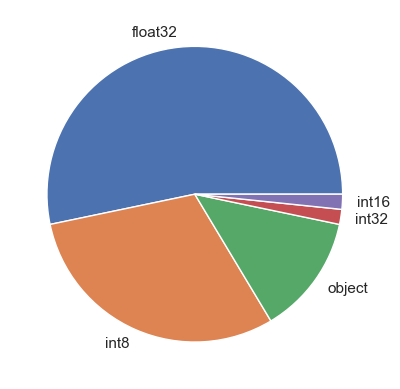

In [42]:
train.dtypes.value_counts().plot.pie()
plt.ylabel('')
plt.show()

In [43]:
list_col = train.columns.tolist()

In [44]:
list_var_categ = train.select_dtypes('object').columns.tolist()
list_var_categ

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [45]:
M_train = recap_missing_values(train)
M_train

,Variable,Nombre de valeurs renseignées,Nombre de valeurs manquantes,Taux de remplissage (%)
0,SK_ID_CURR,307511,0,100.0
1,TARGET,307511,0,100.0
2,NAME_CONTRACT_TYPE,307511,0,100.0
3,CODE_GENDER,307511,0,100.0
4,FLAG_OWN_CAR,307511,0,100.0
...,...,...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,265992,41519,86.5
118,AMT_REQ_CREDIT_BUREAU_WEEK,265992,41519,86.5
119,AMT_REQ_CREDIT_BUREAU_MON,265992,41519,86.5
120,AMT_REQ_CREDIT_BUREAU_QRT,265992,41519,86.5


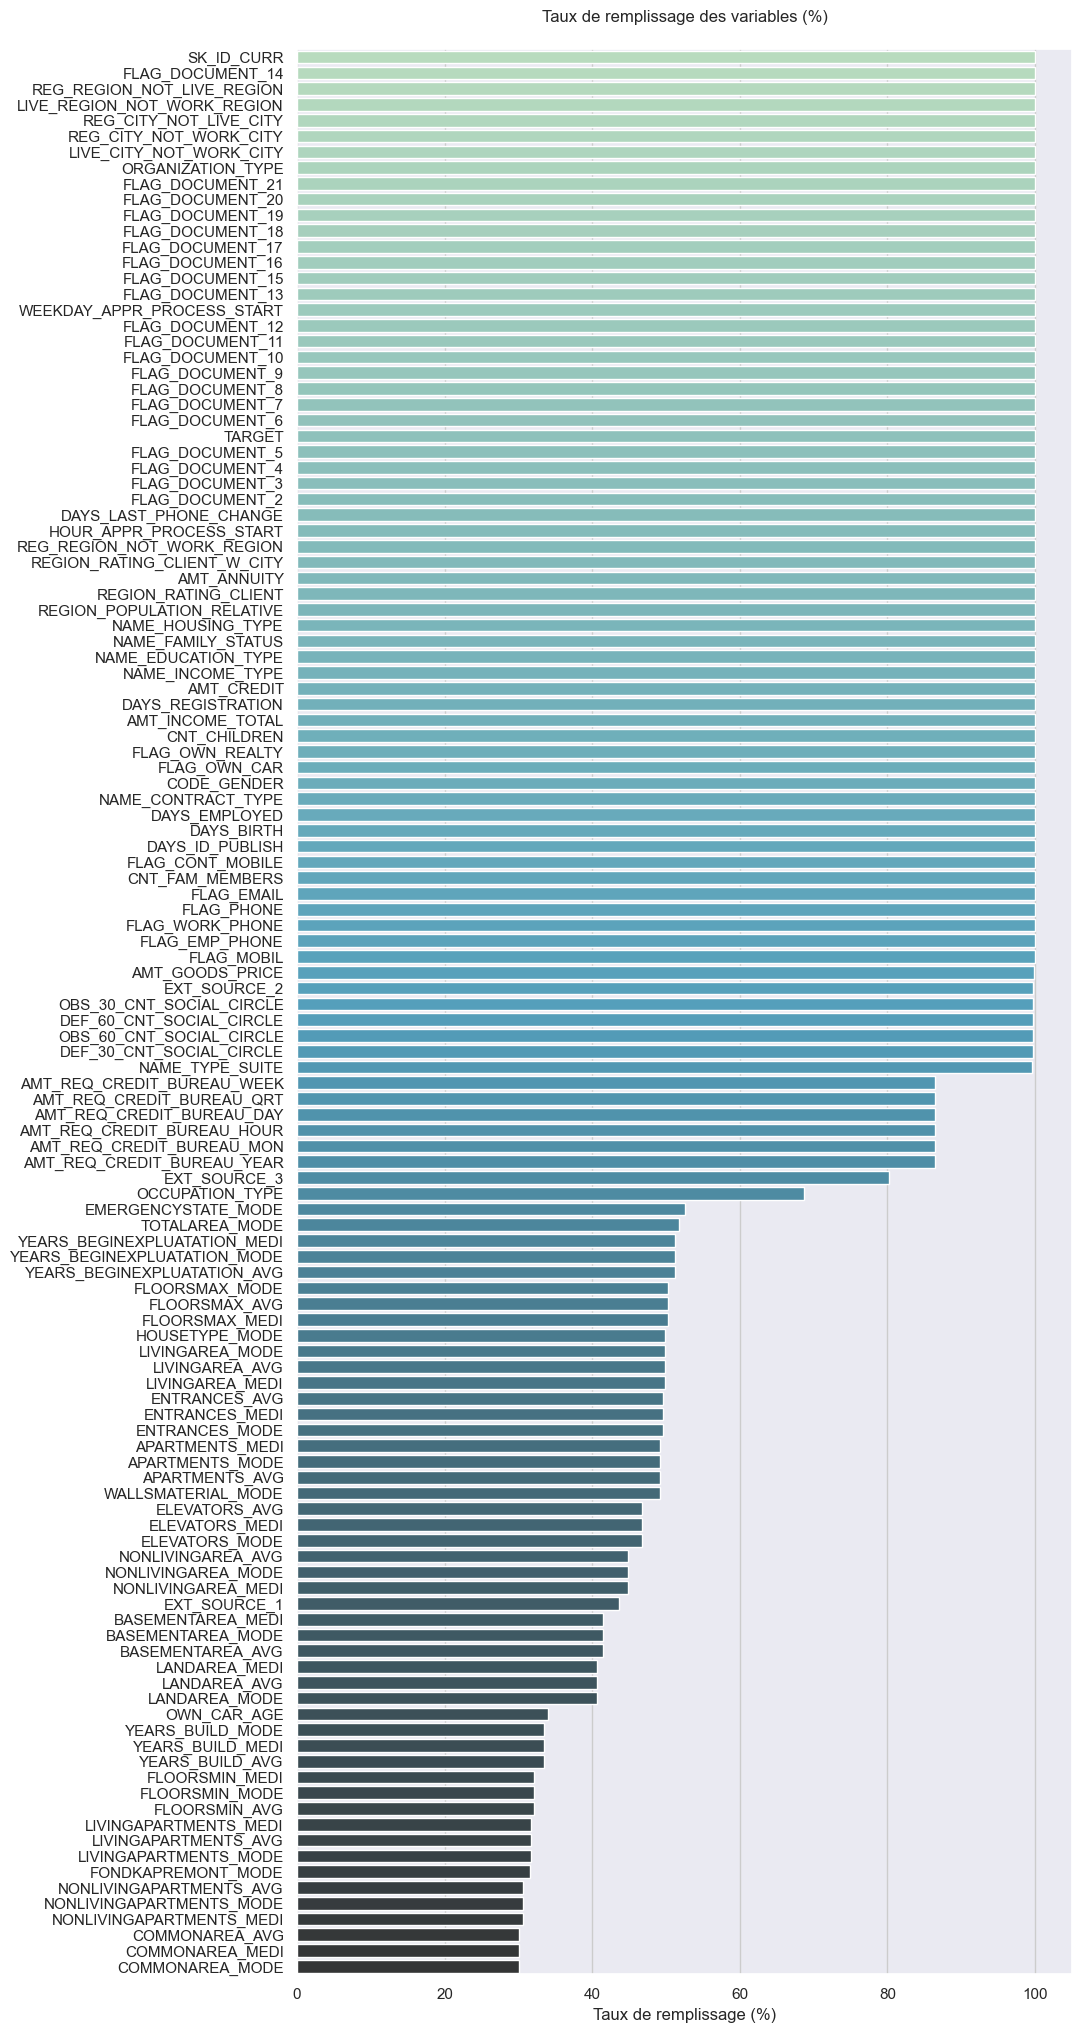

In [46]:
# Taux de remplissage par colonne

plt.figure(figsize=(10, 25))

ax = sns.barplot(data=M_train.sort_values(by="Taux de remplissage (%)", ascending=False), y="Variable",
                 x="Taux de remplissage (%)", palette="GnBu_d")

plt.xlabel("Taux de remplissage (%)")
ax.set(ylabel=None)
plt.grid(axis='x', color='0.8')
plt.title("Taux de remplissage des variables (%)")

plt.show()

On remarque que toutes les variables portant les suffixes "_MODE", "_AVG" et "_MEDI" ont un taux de remplissage (TDR) < 60 %.

In [47]:
cols_buildings = [i for i in train.columns if ('_MODE' in i) | ('_AVG' in i) | ('_MEDI' in i)]
print(f'Nombre de variables liées au batiment du client: {len(cols_buildings)}')
cols_buildings

Nombre de variables liées au batiment du client: 47


['APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERIAL_MODE',
 'EMER

Ces variables sont liées au batiment de résidence du client et ont pour description unique :
"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor".

In [48]:
print(recap_missing_values(train[cols_buildings])['Taux de remplissage (%)'].min())
print(recap_missing_values(train[cols_buildings])['Taux de remplissage (%)'].max())

30.13
52.6


Les TDR de ces variables sont compris entre 30 et 53 %. Nous allons supprimer ces variables car une imputation serait trop hasardeuse.

In [49]:
train.drop(columns=cols_buildings, inplace=True)
test.drop(columns=cols_buildings, inplace=True)

In [50]:
list_col = train.columns.tolist()
list_var_categ = train.select_dtypes('object').columns.tolist()

In [51]:
M_train = recap_missing_values(train)
M_train[M_train["Taux de remplissage (%)"] < 90]

,Variable,Nombre de valeurs renseignées,Nombre de valeurs manquantes,Taux de remplissage (%)
21,OWN_CAR_AGE,104582,202929,34.01
28,OCCUPATION_TYPE,211120,96391,68.65
41,EXT_SOURCE_1,134133,173378,43.62
43,EXT_SOURCE_3,246546,60965,80.17
69,AMT_REQ_CREDIT_BUREAU_HOUR,265992,41519,86.50
70,AMT_REQ_CREDIT_BUREAU_DAY,265992,41519,86.50
71,AMT_REQ_CREDIT_BUREAU_WEEK,265992,41519,86.50
72,AMT_REQ_CREDIT_BUREAU_MON,265992,41519,86.50
73,AMT_REQ_CREDIT_BUREAU_QRT,265992,41519,86.50
74,AMT_REQ_CREDIT_BUREAU_YEAR,265992,41519,86.50


Parmi les variables non liées au batiment de résidence, on dénombre 2 variables avec un TDR < 50 % ("OWN_CAR_AGE", "EXT_SOURCE_1") et une variable avec un TDR d'environ 70 % ("OCCUPATION_TYPE").

Nous verrons par la suite quelle stratégie adopter avec ces variables.

In [52]:
# Recherche de colonnes doublons

duplicateColNames = getDuplicateColumns(train)
d = len(duplicateColNames)
print(f'Nombre de colonnes doublons : {d}')

Nombre de colonnes doublons : 0


In [53]:
# Recherche de lignes doublons sur chaque variable

d = train.duplicated(keep='first').sum()
print(f'Nombre de lignes doublons : {d}')

Nombre de lignes doublons : 0


In [54]:
# Recherche de lignes doublons sur chaque variable

d = test.duplicated(keep='first').sum()
print(f'Nombre de lignes doublons : {d}')

Nombre de lignes doublons : 0


In [55]:
M_test = recap_missing_values(test)
M_test

,Variable,Nombre de valeurs renseignées,Nombre de valeurs manquantes,Taux de remplissage (%)
0,SK_ID_CURR,48744,0,100.00
1,NAME_CONTRACT_TYPE,48744,0,100.00
2,CODE_GENDER,48744,0,100.00
3,FLAG_OWN_CAR,48744,0,100.00
4,FLAG_OWN_REALTY,48744,0,100.00
...,...,...,...,...
69,AMT_REQ_CREDIT_BUREAU_DAY,42695,6049,87.59
70,AMT_REQ_CREDIT_BUREAU_WEEK,42695,6049,87.59
71,AMT_REQ_CREDIT_BUREAU_MON,42695,6049,87.59
72,AMT_REQ_CREDIT_BUREAU_QRT,42695,6049,87.59


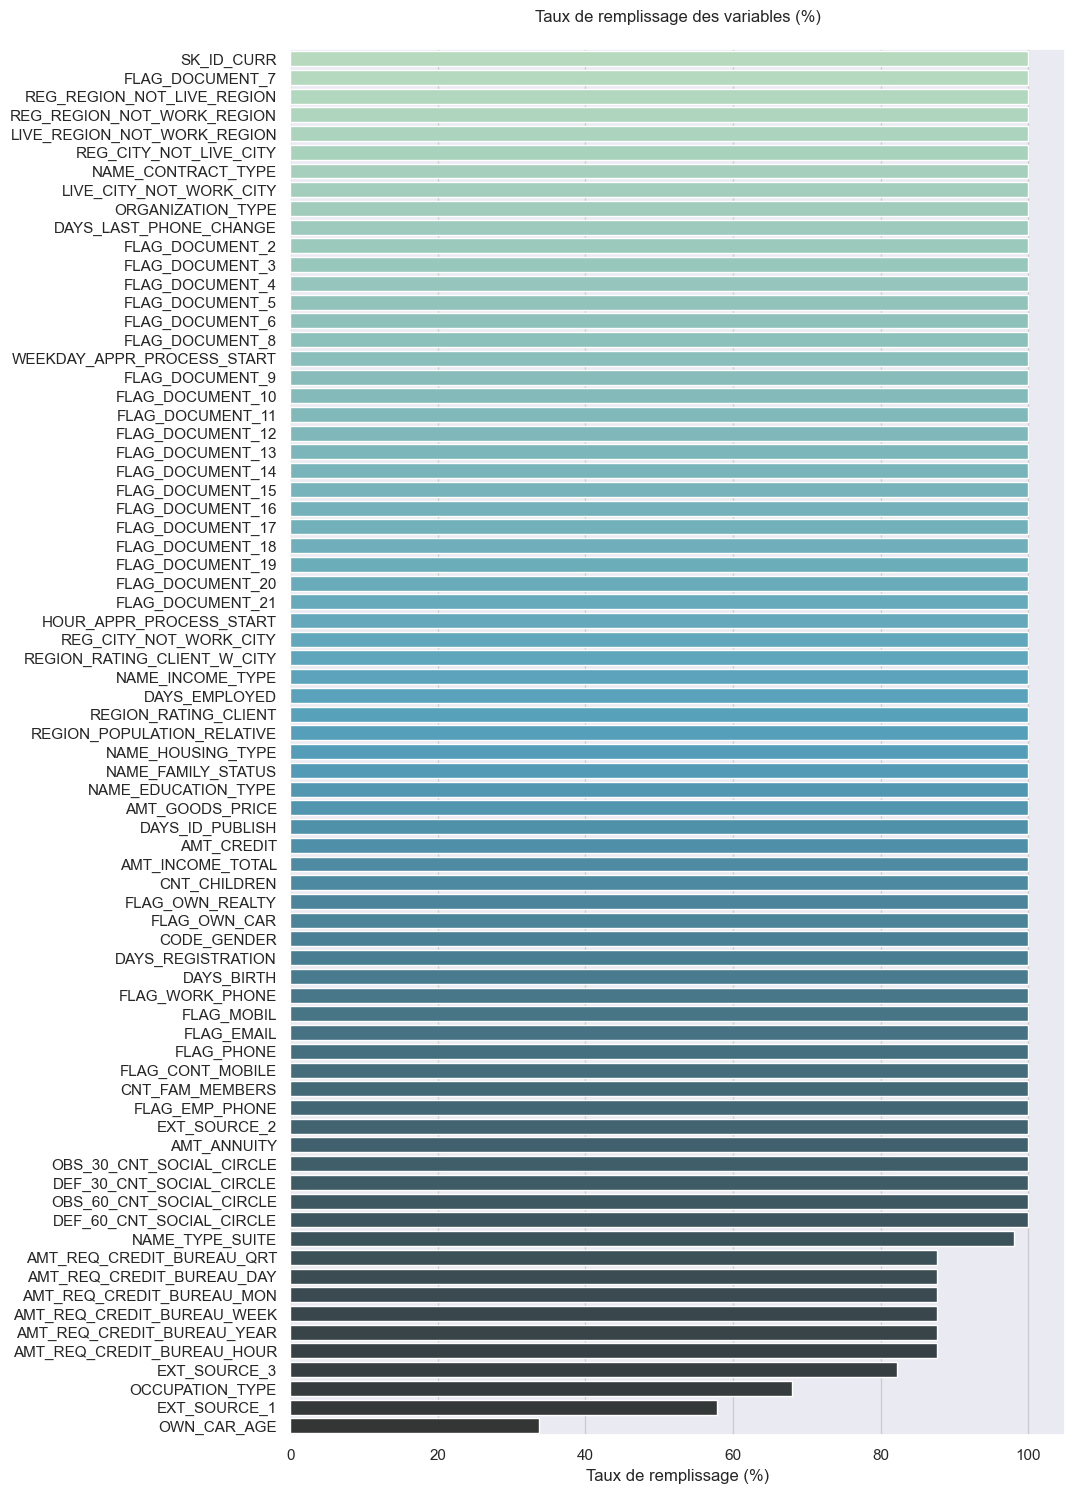

In [56]:
# Taux de remplissage par colonne

plt.figure(figsize=(10, 18))

ax = sns.barplot(data=M_test.sort_values(by="Taux de remplissage (%)", ascending=False), y="Variable",
                 x="Taux de remplissage (%)", palette="GnBu_d")

plt.xlabel("Taux de remplissage (%)")
ax.set(ylabel=None)
plt.grid(axis='x', color='0.8')
plt.title("Taux de remplissage des variables (%)")

plt.show()

In [57]:
M_test = recap_missing_values(test)
M_test[M_test["Taux de remplissage (%)"] < 90]

,Variable,Nombre de valeurs renseignées,Nombre de valeurs manquantes,Taux de remplissage (%)
20,OWN_CAR_AGE,16432,32312,33.71
27,OCCUPATION_TYPE,33139,15605,67.99
40,EXT_SOURCE_1,28212,20532,57.88
42,EXT_SOURCE_3,40076,8668,82.22
68,AMT_REQ_CREDIT_BUREAU_HOUR,42695,6049,87.59
69,AMT_REQ_CREDIT_BUREAU_DAY,42695,6049,87.59
70,AMT_REQ_CREDIT_BUREAU_WEEK,42695,6049,87.59
71,AMT_REQ_CREDIT_BUREAU_MON,42695,6049,87.59
72,AMT_REQ_CREDIT_BUREAU_QRT,42695,6049,87.59
73,AMT_REQ_CREDIT_BUREAU_YEAR,42695,6049,87.59


La distribution des valeurs manquantes est similaire dans les datasets train et test.

<br>

---

### <span style='background :#e3e33d' > 3.2 Clé primaire et target </span>
#### <span style='background :#cdcdfc' > SK_ID_CURR </span>

La variable "SK_ID_CURR" est la clé primaire qui identifie chaque prêt.

In [58]:
train["SK_ID_CURR"].duplicated(keep='first').sum()

0

Aucun doublon.

#### <span style='background :#cdcdfc' > TARGET </span>

La variable "TARGET" est une variable binaire indiquant si le prêt a été remboursé (0) ou non (1).

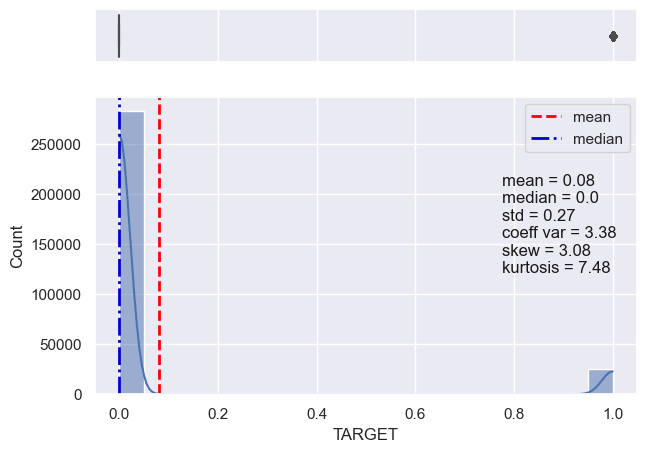

In [59]:
distri(train, "TARGET")

In [60]:
train['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Les deux classes sont fortement déséquilibrées.

<br>

---

### <span style='background :#e3e33d' > 3.3 Nettoyage des variables </span>

Le reste des variables contiennent des informations diverses sur le bénéficiaire du prêt (situation familiale, lieu de résidence, emploi, revenus, etc) et sur le crédit (type, montant, etc). Nous allons nous focaliser sur les plus importantes.

In [61]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### <span style='background :#cdcdfc' > Variables catégoriques </span>

In [62]:
recap_missing_values(train[list_var_categ])

,Variable,Nombre de valeurs renseignées,Nombre de valeurs manquantes,Taux de remplissage (%)
0,NAME_CONTRACT_TYPE,307511,0,100.00
1,CODE_GENDER,307511,0,100.00
2,FLAG_OWN_CAR,307511,0,100.00
3,FLAG_OWN_REALTY,307511,0,100.00
4,NAME_TYPE_SUITE,306219,1292,99.58
5,NAME_INCOME_TYPE,307511,0,100.00
6,NAME_EDUCATION_TYPE,307511,0,100.00
7,NAME_FAMILY_STATUS,307511,0,100.00
8,NAME_HOUSING_TYPE,307511,0,100.00
9,OCCUPATION_TYPE,211120,96391,68.65


In [63]:
# Number of unique classes in each object column
train[list_var_categ].nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [64]:
for f in list_var_categ:
    if train[f].nunique() < 10:
        print(f'{f} : {train[f].unique()}')
        print('')

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']

CODE_GENDER : ['M' 'F' 'XNA']

FLAG_OWN_CAR : ['N' 'Y']

FLAG_OWN_REALTY : ['Y' 'N']

NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

WEEKDAY_APPR_PROCESS_START : ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']



In [65]:
for f in list_var_categ:
    if train[f].nunique() > 10:
        print(f'{f} : {train[f].unique()}')
        print('')

OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']

ORGANIZATION_TYPE : ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other' 'XNA'
 'Electricity' 'Medicine' 'Business Entity Type 2' 'Self-employed'
 'Transport: type 2' 'Construction' 'Housing' 'Kindergarten'
 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 2' 'Transport: type 1' 'Industry: typ

In [66]:
for c in list_var_categ:
    c_train = set(train[c].unique())
    c_test = set(test[c].unique())
    diff_train = c_test - c_train
    diff_test = c_train - c_test
    if len(diff_train) > 0:
        print('Category(ies) missing in train set for feature ' + c + ':', diff_train)
    if len(diff_test) > 0:
        print('Category(ies) missing in test set for feature ' + c + ':', diff_test)

Category(ies) missing in test set for feature CODE_GENDER: {'XNA'}
Category(ies) missing in test set for feature NAME_INCOME_TYPE: {'Maternity leave'}
Category(ies) missing in test set for feature NAME_FAMILY_STATUS: {'Unknown'}


In [67]:
print(train.loc[train['CODE_GENDER'] == 'XNA'].shape[0])

4


In [68]:
train.loc[train['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'

In [69]:
print(train.loc[train['NAME_INCOME_TYPE'] == 'Maternity leave'].shape[0])

5


In [70]:
train = train[train['NAME_INCOME_TYPE'] != 'Maternity leave']

In [71]:
print(train.loc[train['NAME_FAMILY_STATUS'] == 'Unknown'].shape[0])

2


In [72]:
train = train[train['NAME_FAMILY_STATUS'] != 'Unknown']

In [73]:
train.loc[train['OCCUPATION_TYPE'].isna()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Name: NAME_INCOME_TYPE, dtype: int64

In [74]:
train.loc[train['NAME_INCOME_TYPE'] == 'Pensioner', 'OCCUPATION_TYPE'] = 'Pensioner'
train.loc[train['NAME_INCOME_TYPE'] == 'Unemployed', 'OCCUPATION_TYPE'] = 'Unemployed'

In [75]:
train.loc[train['ORGANIZATION_TYPE'] == 'XNA']['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [76]:
train.loc[train['NAME_INCOME_TYPE'] == 'Pensioner', 'ORGANIZATION_TYPE'] = 'Pensioner'
train.loc[train['NAME_INCOME_TYPE'] == 'Unemployed', 'ORGANIZATION_TYPE'] = 'Unemployed'

In [77]:
train[list_var_categ] = train[list_var_categ].fillna('Unknown')

In [78]:
missing_values(train[list_var_categ])

Le jeu de données contient 0 valeurs manquantes (0%).


In [79]:
for f in list_var_categ:
    if train[f].nunique() < 10:
        print(f'{f} : {train[f].unique()}')
        print('')

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']

CODE_GENDER : ['M' 'F']

FLAG_OWN_CAR : ['N' 'Y']

FLAG_OWN_REALTY : ['Y' 'N']

NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Unknown'
 'Other_B' 'Group of people']

NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman']

NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']

NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

WEEKDAY_APPR_PROCESS_START : ['WEDNESDAY' 'MONDAY' 'THURSDAY' 'SUNDAY' 'SATURDAY' 'FRIDAY' 'TUESDAY']



In [80]:
for f in list_var_categ:
    if train[f].nunique() > 10:
        print(f'{f} : {train[f].unique()}')
        print('')

OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Pensioner' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Unknown'
 'Private service staff' 'Medicine staff' 'Security staff'
 'High skill tech staff' 'Waiters/barmen staff' 'Low-skill Laborers'
 'Realty agents' 'Secretaries' 'IT staff' 'HR staff' 'Unemployed']

ORGANIZATION_TYPE : ['Business Entity Type 3' 'School' 'Government' 'Religion' 'Other'
 'Pensioner' 'Electricity' 'Medicine' 'Business Entity Type 2'
 'Self-employed' 'Transport: type 2' 'Construction' 'Housing'
 'Kindergarten' 'Trade: type 7' 'Industry: type 11' 'Military' 'Services'
 'Security Ministries' 'Transport: type 4' 'Industry: type 1' 'Emergency'
 'Security' 'Trade: type 2' 'University' 'Transport: type 3' 'Police'
 'Business Entity Type 1' 'Postal' 'Industry: type 4' 'Agriculture'
 'Restaurant' 'Culture' 'Hotel' 'Industry: type 7' 'Trade: type 3'
 'Industry: type 3' 'Bank' 'Industry: type 9' 'Insurance' 'Trade: type 6'
 'Industry: type 

In [81]:
col_to_del = compute_mode_percentage(train, list_var_categ, threshold=0.94)
col_to_del

                        Column                           Mode  Mode_pct
10  WEEKDAY_APPR_PROCESS_START                        TUESDAY  0.175279
9              OCCUPATION_TYPE                      Pensioner  0.180037
11           ORGANIZATION_TYPE         Business Entity Type 3  0.221100
5             NAME_INCOME_TYPE                        Working  0.516331
7           NAME_FAMILY_STATUS                        Married  0.638779
1                  CODE_GENDER                              F  0.658356
2                 FLAG_OWN_CAR                              N  0.659887
3              FLAG_OWN_REALTY                              Y  0.693669
6          NAME_EDUCATION_TYPE  Secondary / secondary special  0.710199
4              NAME_TYPE_SUITE                  Unaccompanied  0.808194
8            NAME_HOUSING_TYPE              House / apartment  0.887345
0           NAME_CONTRACT_TYPE                     Cash loans  0.904801

Liste des features à supprimer :
[]


[]

#### <span style='background :#cdcdfc' > Variables binaires </span>

In [82]:
list_var_binaire = sorted(list(set(train.columns[train[list_col].nunique() == 2].tolist()) - set(list_var_categ)))
list_var_binaire.remove('TARGET')

In [83]:
list_var_binaire

['FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION']

In [84]:
col_to_del = compute_mode_percentage(train, list_var_binaire, threshold=0.94)
col_to_del

                         Column  Mode  Mode_pct
14              FLAG_DOCUMENT_3     1  0.710040
24                   FLAG_PHONE     0  0.718937
29       REG_CITY_NOT_WORK_CITY     0  0.769548
25              FLAG_WORK_PHONE     0  0.800630
22               FLAG_EMP_PHONE     1  0.819885
26      LIVE_CITY_NOT_WORK_CITY     0  0.820448
17              FLAG_DOCUMENT_6     0  0.911943
19              FLAG_DOCUMENT_8     0  0.918622
28       REG_CITY_NOT_LIVE_CITY     0  0.921825
21                   FLAG_EMAIL     0  0.943279
31   REG_REGION_NOT_WORK_REGION     0  0.949236
27  LIVE_REGION_NOT_WORK_REGION     0  0.959347
30   REG_REGION_NOT_LIVE_REGION     0  0.984855
16              FLAG_DOCUMENT_5     0  0.984888
7              FLAG_DOCUMENT_16     0  0.990072
9              FLAG_DOCUMENT_18     0  0.991870
2              FLAG_DOCUMENT_11     0  0.996088
20              FLAG_DOCUMENT_9     0  0.996104
4              FLAG_DOCUMENT_13     0  0.996475
5              FLAG_DOCUMENT_14     0  0

['FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_MOBIL',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION']

In [85]:
col_flag_doc = [f for f in train.columns if f.startswith('FLAG_DOC')]

train['CNT_DOC'] = train[col_flag_doc].sum(axis=1)

In [86]:
train.drop(columns=col_to_del, inplace=True)

In [87]:
list_col = train.columns.tolist()

In [88]:
list_var_binaire = sorted(list(set(train.columns[train[list_col].nunique() == 2].tolist()) - set(list_var_categ)))
list_var_binaire.remove('TARGET')

#### <span style='background :#cdcdfc' > Variables liées aux revenus </span>

In [89]:
col_revenu = ["AMT_INCOME_TOTAL",
              "AMT_CREDIT",
              "AMT_ANNUITY",
              "AMT_GOODS_PRICE"]

In [90]:
percentile_report(train, col_revenu)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
AMT_INCOME_TOTAL,25650.0,45000.000000,67500.0,81000.0,112500.0,147150.0,202500.0,270000.0,337500.0,472500.0,117000000.0
AMT_CREDIT,45000.0,76410.000000,135000.0,180000.0,270000.0,513531.0,808650.0,1133748.0,1350000.0,1854000.0,4050000.0
AMT_ANNUITY,1615.5,6182.595215,9000.0,11074.5,16524.0,24903.0,34596.0,45954.0,53325.0,70006.5,258025.5
AMT_GOODS_PRICE,40500.0,67500.000000,135000.0,180000.0,238500.0,450000.0,679500.0,1093500.0,1305000.0,1800000.0,4050000.0


In [91]:
train['PERC_INC_CRED'] = train['AMT_INCOME_TOTAL'] / train['AMT_CREDIT']
train['PERC_INC_ANN'] = train['AMT_INCOME_TOTAL'] / train['AMT_ANNUITY']

In [92]:
percentile_report(train, ["PERC_INC_CRED", "PERC_INC_ANN"])

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
PERC_INC_CRED,0.011801,0.076767,0.109222,0.133556,0.193803,0.306272,0.495376,0.750883,1.00000,1.679725,208.003326
PERC_INC_ANN,0.533059,2.068659,2.819549,3.315210,4.365541,6.141249,8.712181,12.500000,15.96594,25.333464,4466.586426


In [93]:
# distri(train, "AMT_INCOME_TOTAL", xlim=[0, 2e7])

In [94]:
detect_outliers(train, "AMT_INCOME_TOTAL", n=1, method='iqr').head(5)[
    col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                  'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
12840,117000000.0,562491.0,26194.5,454500.0,1,208.003326,4466.586426,Working,Laborers,Business Entity Type 3
203693,18000090.0,675000.0,69295.5,675000.0,0,26.666800,259.758423,Commercial associate,Unknown,Business Entity Type 3
246858,13500000.0,1400503.5,130945.5,1368000.0,0,9.639390,103.096329,Commercial associate,Unknown,Business Entity Type 3
77768,9000000.0,1431531.0,132601.5,1377000.0,0,6.286975,67.872536,Working,Managers,Business Entity Type 1
131127,6750000.0,790830.0,52978.5,675000.0,0,8.535336,127.410179,Working,Laborers,Transport: type 4


In [95]:
# distri(train, 'PERC_INC_CRED', xlim=[0, 30])

In [96]:
detect_outliers(train, "PERC_INC_CRED", n=1, method='iqr').head(5)[
    col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                  'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
12840,117000000.0,562491.0,26194.5,454500.0,1,208.003326,4466.586426,Working,Laborers,Business Entity Type 3
203693,18000090.0,675000.0,69295.5,675000.0,0,26.666800,259.758423,Commercial associate,Unknown,Business Entity Type 3
258773,2700000.0,180000.0,9000.0,180000.0,0,15.000000,300.000000,Working,Managers,Police
146187,1890000.0,144000.0,11673.0,144000.0,0,13.125000,161.912109,State servant,Unknown,Emergency
78009,540000.0,45000.0,5598.0,45000.0,0,12.000000,96.463020,Commercial associate,Core staff,Bank


In [97]:
train.nsmallest(10, 'PERC_INC_CRED')[col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
20727,25650.0,2173500.0,48118.5,2173500.0,1,0.011801,0.533059,Pensioner,Pensioner,Pensioner
35791,45000.0,2215224.0,58567.5,1980000.0,0,0.020314,0.768344,Pensioner,Pensioner,Pensioner
226137,45000.0,1800000.0,62698.5,1800000.0,1,0.025000,0.717721,Pensioner,Pensioner,Pensioner
255247,58500.0,2146500.0,51340.5,2146500.0,1,0.027254,1.139451,Working,Core staff,Police
158077,40500.0,1436850.0,42142.5,1125000.0,0,0.028187,0.961025,Pensioner,Pensioner,Pensioner
678,54000.0,1885500.0,74191.5,1885500.0,1,0.028640,0.727846,Pensioner,Pensioner,Pensioner
205575,36000.0,1223010.0,48627.0,1125000.0,1,0.029436,0.740329,Pensioner,Pensioner,Pensioner
103862,54000.0,1800000.0,47484.0,1800000.0,0,0.030000,1.137225,Pensioner,Pensioner,Pensioner
165555,27000.0,900000.0,26316.0,900000.0,0,0.030000,1.025992,Working,Unknown,Business Entity Type 1
193574,27900.0,916470.0,26928.0,765000.0,0,0.030443,1.036096,Pensioner,Pensioner,Pensioner


Pensioner

In [98]:
# distri(train, 'PERC_INC_ANN', xlim=[0, 305])

In [99]:
detect_outliers(train, 'PERC_INC_ANN', n=1, method='iqr').head(5)[
    col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                  'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
12840,117000000.0,562491.0,26194.5,454500.0,1,208.003326,4466.586426,Working,Laborers,Business Entity Type 3
258773,2700000.0,180000.0,9000.0,180000.0,0,15.000000,300.000000,Working,Managers,Police
203693,18000090.0,675000.0,69295.5,675000.0,0,26.666800,259.758423,Commercial associate,Unknown,Business Entity Type 3
1723,1935000.0,269550.0,10534.5,225000.0,0,7.178631,183.682190,Pensioner,Pensioner,Pensioner
120597,1125000.0,135000.0,6750.0,135000.0,0,8.333333,166.666672,Commercial associate,Managers,Trade: type 2


In [100]:
train[(train['AMT_INCOME_TOTAL'] > 1e7) & (train['PERC_INC_CRED'] > 20)][
    col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                  'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
12840,117000000.0,562491.0,26194.5,454500.0,1,208.003326,4466.586426,Working,Laborers,Business Entity Type 3
203693,18000090.0,675000.0,69295.5,675000.0,0,26.666800,259.758423,Commercial associate,Unknown,Business Entity Type 3


In [101]:
# Suppression des outliers extremes

train = train[(train['AMT_INCOME_TOTAL'] < 1e7) & (train['PERC_INC_CRED'] < 20)]

In [102]:
train['AMT_MONTHS'] = train['AMT_CREDIT'] / train['AMT_ANNUITY']

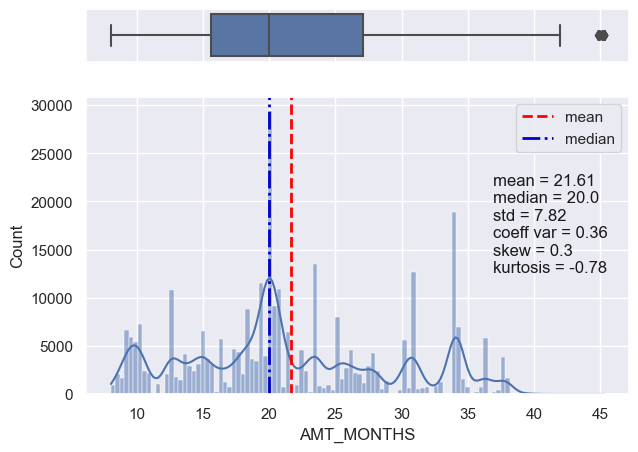

In [103]:
distri(train, 'AMT_MONTHS')

In [104]:
detect_outliers(train, 'AMT_MONTHS', n=1, method='iqr').head(7)[
    col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
202366,94500.0,558000.0,12316.5,558000.0,0,0.169355,7.672634,State servant,Core staff,Other
85632,54000.0,486000.0,10728.0,486000.0,0,0.111111,5.033557,State servant,Medicine staff,Medicine
62194,112500.0,1008000.0,22252.5,1008000.0,0,0.111607,5.055612,Working,Medicine staff,Business Entity Type 3
45179,90000.0,1107000.0,24439.5,1107000.0,1,0.081301,3.682563,Working,Laborers,Business Entity Type 2
69092,112500.0,1903500.0,42025.5,1903500.0,1,0.059102,2.676946,Pensioner,Pensioner,Pensioner
254181,166500.0,1494000.0,32985.0,1494000.0,0,0.111446,5.047749,Working,Laborers,Restaurant
158579,495000.0,2295000.0,50670.0,2295000.0,0,0.215686,9.769094,Commercial associate,Unknown,Bank


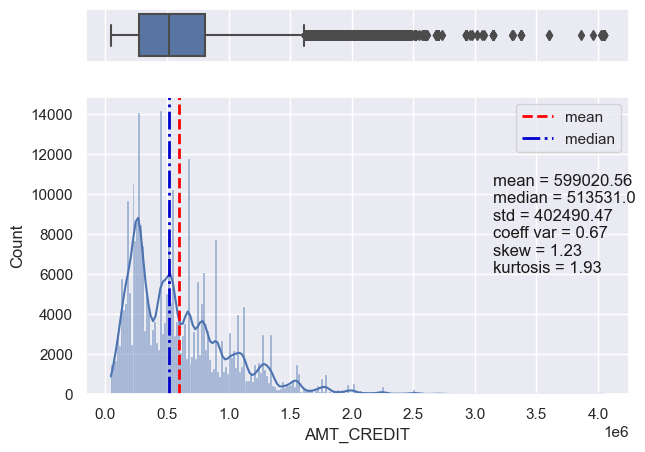

In [105]:
distri(train, 'AMT_CREDIT')

In [106]:
detect_outliers(train, 'AMT_CREDIT', n=1, method='iqr').head(10)[
    col_revenu + ['TARGET', 'PERC_INC_CRED', 'PERC_INC_ANN', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
                  'ORGANIZATION_TYPE']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET,PERC_INC_CRED,PERC_INC_ANN,NAME_INCOME_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE
287732,405000.0,4050000.0,102514.5,4050000.0,0,0.100000,3.950661,Commercial associate,Accountants,Business Entity Type 3
120757,587250.0,4050000.0,106969.5,4050000.0,0,0.145000,5.489882,Commercial associate,Unknown,Industry: type 1
119681,931365.0,4050000.0,102514.5,4050000.0,0,0.229967,9.085202,Commercial associate,Managers,Transport: type 4
288455,450000.0,4050000.0,106839.0,4050000.0,0,0.111111,4.211945,Commercial associate,Managers,Business Entity Type 3
14852,760846.5,4050000.0,146002.5,4050000.0,0,0.187863,5.211188,Commercial associate,Managers,Trade: type 7
17948,783000.0,4050000.0,258025.5,4050000.0,0,0.193333,3.034584,Commercial associate,Managers,Industry: type 4
133766,1307587.5,4050000.0,100197.0,4050000.0,0,0.322861,13.050166,Commercial associate,Managers,Trade: type 2
110459,864900.0,4050000.0,102384.0,4050000.0,0,0.213556,8.447609,Commercial associate,Managers,Business Entity Type 3
95571,430650.0,4031032.5,102033.0,3712500.0,0,0.106834,4.220693,Working,Managers,Business Entity Type 3
186230,458550.0,4027680.0,106380.0,3600000.0,1,0.113850,4.310491,Commercial associate,Unknown,Business Entity Type 3


In [107]:
train['PERC_INSURANCE_CRED'] = (train['AMT_CREDIT'] - train['AMT_GOODS_PRICE']) / train['AMT_CREDIT']

In [108]:
print(train[train['PERC_INSURANCE_CRED'] < 0].shape[0])
train[train['PERC_INSURANCE_CRED'] < 0][col_revenu + ['NAME_CONTRACT_TYPE', 'PERC_INSURANCE_CRED', 'TARGET']].head(10)

260


,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE,PERC_INSURANCE_CRED,TARGET
1942,540000.0,315000.0,15750.0,450000.0,Revolving loans,-0.428571,0
2138,112500.0,135000.0,6750.0,202500.0,Revolving loans,-0.500000,0
2808,189000.0,337500.0,16875.0,540000.0,Revolving loans,-0.600000,0
3769,112500.0,135000.0,6750.0,382500.0,Revolving loans,-1.833333,0
4179,436500.0,450000.0,22500.0,900000.0,Revolving loans,-1.000000,0
4858,67500.0,157500.0,7875.0,202500.0,Revolving loans,-0.285714,0
5838,157500.0,157500.0,7875.0,180000.0,Revolving loans,-0.142857,0
6654,112500.0,225000.0,11250.0,337500.0,Revolving loans,-0.500000,0
11372,180000.0,675000.0,33750.0,1350000.0,Revolving loans,-1.000000,0
12420,315000.0,540000.0,27000.0,900000.0,Revolving loans,-0.666667,0


In [109]:
train[train['PERC_INSURANCE_CRED'] < 0]['NAME_CONTRACT_TYPE'].unique()

array(['Revolving loans'], dtype=object)

In [110]:
train.loc[train['PERC_INSURANCE_CRED'] < 0, 'PERC_INSURANCE_CRED'] = 0

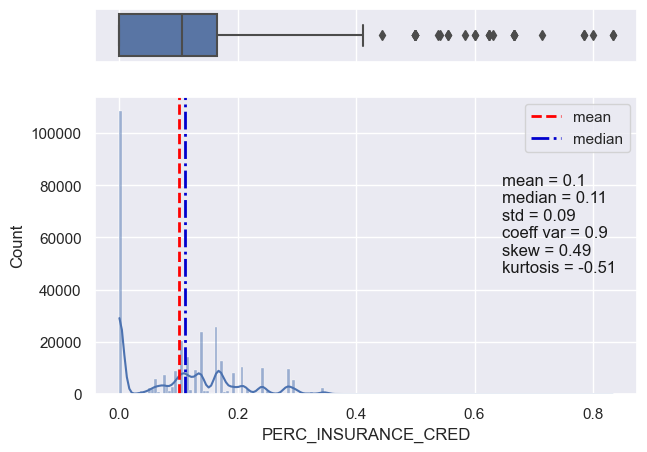

In [111]:
distri(train, 'PERC_INSURANCE_CRED')

In [112]:
detect_outliers(train, 'PERC_INSURANCE_CRED', n=1, method='iqr')[col_revenu + ['NAME_CONTRACT_TYPE', 'PERC_INSURANCE_CRED', 'TARGET']].head(10)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_CONTRACT_TYPE,PERC_INSURANCE_CRED,TARGET
167370,202500.0,270000.0,13500.0,45000.0,Revolving loans,0.833333,0
40302,202500.0,270000.0,13500.0,45000.0,Revolving loans,0.833333,0
241021,180000.0,675000.0,33750.0,135000.0,Revolving loans,0.800000,0
226807,81000.0,315000.0,15750.0,67500.0,Revolving loans,0.785714,0
75080,225000.0,630000.0,31500.0,135000.0,Revolving loans,0.785714,0
12139,168750.0,315000.0,15750.0,90000.0,Revolving loans,0.714286,0
288401,135000.0,135000.0,6750.0,45000.0,Revolving loans,0.666667,0
42864,225000.0,337500.0,16875.0,112500.0,Revolving loans,0.666667,0
169894,202500.0,270000.0,13500.0,90000.0,Revolving loans,0.666667,0
40074,112500.0,270000.0,13500.0,90000.0,Revolving loans,0.666667,0


In [113]:
train['INCOME_PER_MEMBER'] = train['AMT_INCOME_TOTAL'] / train['CNT_FAM_MEMBERS']
train['INCOME_PER_CHILD'] = train['AMT_INCOME_TOTAL'] / (train['CNT_CHILDREN'] + 1)

#### <span style='background :#cdcdfc' > Variables temporelles </span>

In [114]:
col_days = [col for col in train.columns if col.startswith('DAYS_')]
col_days

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [115]:
percentile_report(train, col_days)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
DAYS_BIRTH,-25229.0,-24419.0,-23204.0,-22181.0,-19682.0,-15750.0,-12413.0,-10284.0,-9407.0,-8263.0,-7489.0
DAYS_EMPLOYED,-17912.0,-10895.0,-6743.0,-4881.0,-2760.0,-1213.0,-289.0,365243.0,365243.0,365243.0,365243.0
DAYS_REGISTRATION,-24672.0,-13879.0,-11416.0,-9932.0,-7480.0,-4504.0,-2010.0,-690.0,-330.0,-50.0,0.0
DAYS_ID_PUBLISH,-7197.0,-5447.0,-4944.0,-4724.0,-4299.0,-3254.0,-1720.0,-730.0,-375.0,-61.0,0.0
DAYS_LAST_PHONE_CHANGE,-4292.0,-3149.0,-2522.0,-2158.0,-1570.0,-757.0,-274.0,0.0,0.0,0.0,0.0


In [116]:
percentile_report(train[col_days] / -365, col_days)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
DAYS_BIRTH,20.517808,22.638356,25.772603,28.175342,34.008219,43.150685,53.923288,60.769863,63.572603,66.901370,69.120548
DAYS_EMPLOYED,-1000.665753,-1000.665753,-1000.665753,-1000.665753,0.791781,3.323288,7.561644,13.372603,18.473973,29.849315,49.073973
DAYS_REGISTRATION,0.000000,0.136986,0.904110,1.890411,5.506849,12.339726,20.493151,27.210958,31.276712,38.024658,67.594521
DAYS_ID_PUBLISH,0.000000,0.167123,1.027397,2.000000,4.712329,8.915068,11.778082,12.942466,13.545205,14.923288,19.717808
DAYS_LAST_PHONE_CHANGE,0.000000,-0.000000,-0.000000,-0.000000,0.750685,2.073973,4.301370,5.912329,6.909589,8.627398,11.758904


In [117]:
train[(train['DAYS_EMPLOYED'] / -365) < 0]['NAME_INCOME_TYPE'].value_counts()

Pensioner     55352
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [118]:
train[(train['DAYS_EMPLOYED'] / -365) == 0]['NAME_INCOME_TYPE'].value_counts()

Working    2
Name: NAME_INCOME_TYPE, dtype: int64

In [119]:
train.loc[train['DAYS_EMPLOYED'] == 0, 'DAYS_EMPLOYED'] = -1

train.loc[train['NAME_INCOME_TYPE'] == 'Pensioner', 'DAYS_EMPLOYED'] = 40 * 365
train.loc[train['NAME_INCOME_TYPE'] == 'Unemployed', 'DAYS_EMPLOYED'] = 20 * 7

In [120]:
percentile_report(train, col_days)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
DAYS_BIRTH,-25229.0,-24419.0,-23204.0,-22181.0,-19682.0,-15750.0,-12413.0,-10284.0,-9407.0,-8263.0,-7489.0
DAYS_EMPLOYED,-17912.0,-10893.0,-6740.0,-4880.0,-2760.0,-1213.0,-289.0,14600.0,14600.0,14600.0,14600.0
DAYS_REGISTRATION,-24672.0,-13879.0,-11416.0,-9932.0,-7480.0,-4504.0,-2010.0,-690.0,-330.0,-50.0,0.0
DAYS_ID_PUBLISH,-7197.0,-5447.0,-4944.0,-4724.0,-4299.0,-3254.0,-1720.0,-730.0,-375.0,-61.0,0.0
DAYS_LAST_PHONE_CHANGE,-4292.0,-3149.0,-2522.0,-2158.0,-1570.0,-757.0,-274.0,0.0,0.0,0.0,0.0


In [121]:
train['DAYS_EMPLOYED_PERC'] = train['DAYS_EMPLOYED'] / train['DAYS_BIRTH']
train['ID_TO_BIRTH_RATIO'] = train['DAYS_ID_PUBLISH'] / train['DAYS_BIRTH']
train['CAR_TO_BIRTH_RATIO'] = train['OWN_CAR_AGE'] / (train['DAYS_BIRTH'] / -365)
train['PHONE_TO_BIRTH_RATIO'] = train['DAYS_LAST_PHONE_CHANGE'] / train['DAYS_BIRTH']
train['INCOME_TO_BIRTH_RATIO'] = - train['AMT_INCOME_TOTAL'] / train['DAYS_BIRTH']
train['AGE_END'] = train['AMT_MONTHS'] / 12 + (train['DAYS_BIRTH'] / -365)

train['INCOME_TO_EMPLOYED_RATIO'] = - train['AMT_INCOME_TOTAL'] / train['DAYS_EMPLOYED']
train['CAR_TO_EMPLOYED_RATIO'] = train['OWN_CAR_AGE'] / (train['DAYS_EMPLOYED'] / -365)

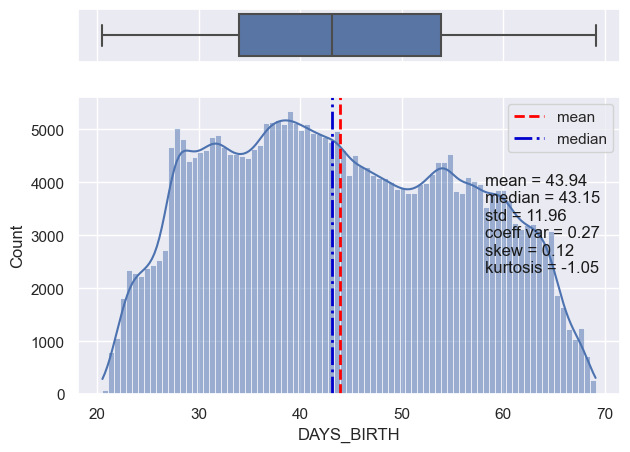

In [122]:
distri(train[['DAYS_BIRTH']] / -365, 'DAYS_BIRTH')

In [123]:
def get_age_label(days_birth):
    """ Return the age group label (int). """
    age_years = -days_birth / 365
    if age_years < 27: return 1
    elif age_years < 40: return 2
    elif age_years < 50: return 3
    elif age_years < 60: return 4
    elif age_years < 99: return 5
    else: return 0

In [124]:
train['AGE_RANGE'] = train['DAYS_BIRTH'].apply(lambda x: get_age_label(x))

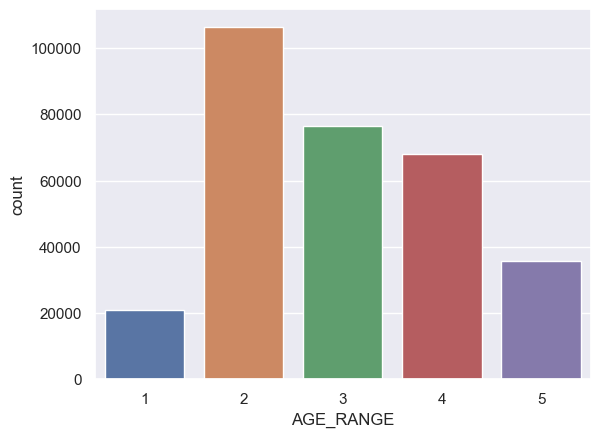

In [125]:
sns.countplot(train, x= 'AGE_RANGE');

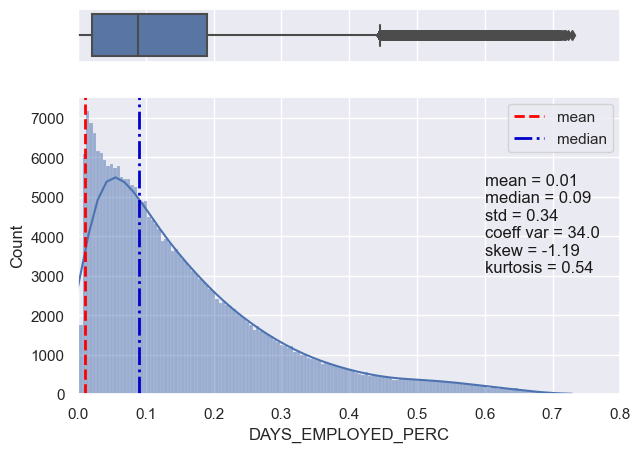

In [126]:
distri(train, 'DAYS_EMPLOYED_PERC', xlim=[0, 0.8])

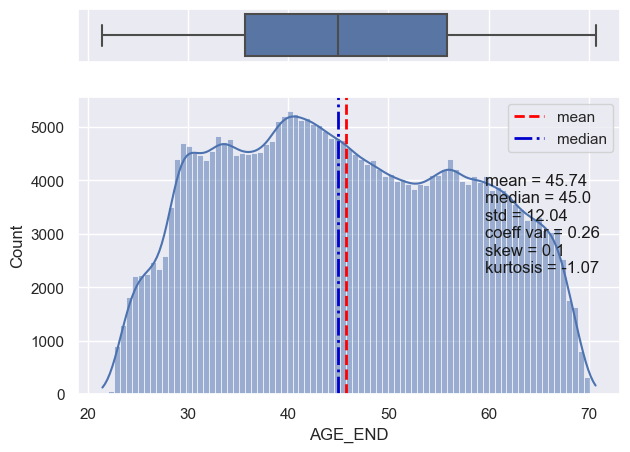

In [127]:
distri(train, 'AGE_END')

#### <span style='background :#cdcdfc' > Variables CREDIT_BUREAU </span>

In [128]:
col_cred_bur = [f for f in list_col if f.startswith('AMT_REQ')]
col_cred_bur

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [129]:
percentile_report(train, col_cred_bur)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
AMT_REQ_CREDIT_BUREAU_HOUR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
AMT_REQ_CREDIT_BUREAU_DAY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
AMT_REQ_CREDIT_BUREAU_MON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,27.0
AMT_REQ_CREDIT_BUREAU_QRT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,261.0
AMT_REQ_CREDIT_BUREAU_YEAR,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,6.0,8.0,25.0


In [130]:
detect_outliers(train, 'AMT_REQ_CREDIT_BUREAU_QRT', n=1, method='iqr')[
    col_revenu + col_cred_bur + ['TARGET']].head(10)

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
239474,360000.0,1035000.0,30393.0,1035000.0,0.0,0.0,0.0,1.0,261.0,0.0,0
253541,202500.0,675000.0,34596.0,675000.0,0.0,0.0,0.0,0.0,19.0,2.0,1
289714,270000.0,389043.0,30235.5,333000.0,0.0,0.0,0.0,1.0,8.0,2.0,0
3770,202500.0,137538.0,14724.0,121500.0,0.0,0.0,0.0,0.0,8.0,0.0,0
195971,450000.0,1350000.0,67500.0,1350000.0,0.0,0.0,0.0,0.0,8.0,0.0,0
62052,157500.0,270000.0,32040.0,270000.0,0.0,0.0,0.0,0.0,8.0,2.0,0
16194,450000.0,545040.0,25537.5,450000.0,0.0,0.0,0.0,0.0,8.0,5.0,0
257728,256500.0,540000.0,22698.0,540000.0,0.0,0.0,0.0,0.0,8.0,2.0,0
127569,202500.0,1323000.0,47650.5,1323000.0,0.0,0.0,0.0,0.0,8.0,5.0,0
11326,90000.0,539230.5,27697.5,409500.0,0.0,0.0,0.0,0.0,7.0,1.0,0


In [131]:
train.loc[train['AMT_REQ_CREDIT_BUREAU_QRT'] > 30, 'AMT_REQ_CREDIT_BUREAU_QRT'] = 30

In [132]:
col_to_del = compute_mode_percentage(train, col_cred_bur, threshold=0.94)
col_to_del

                       Column  Mode  Mode_pct
5  AMT_REQ_CREDIT_BUREAU_YEAR   0.0  0.269936
4   AMT_REQ_CREDIT_BUREAU_QRT   0.0  0.809861
3   AMT_REQ_CREDIT_BUREAU_MON   0.0  0.835486
2  AMT_REQ_CREDIT_BUREAU_WEEK   0.0  0.967908
0  AMT_REQ_CREDIT_BUREAU_HOUR   0.0  0.993887
1   AMT_REQ_CREDIT_BUREAU_DAY   0.0  0.994402

Liste des features à supprimer :
['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK']


['AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK']

In [133]:
train.drop(columns=col_to_del, inplace=True)

#### <span style='background :#cdcdfc' > Variables SOCIAL_CIRCLE </span>

In [134]:
col_social = [f for f in train.columns if f.endswith('_SOCIAL_CIRCLE')]
col_social

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [135]:
percentile_report(train, col_social)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
OBS_30_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0,10.0,348.0
DEF_30_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,34.0
OBS_60_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,6.0,10.0,344.0
DEF_60_CNT_SOCIAL_CIRCLE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,24.0


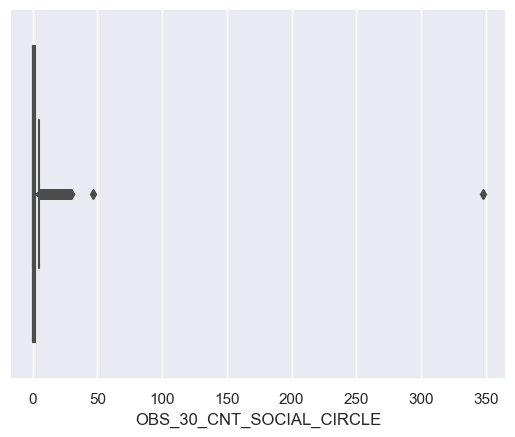

In [136]:
sns.boxplot(x=train['OBS_30_CNT_SOCIAL_CIRCLE']);

In [137]:
detect_outliers(train, 'OBS_30_CNT_SOCIAL_CIRCLE', n=1, method='iqr')[col_social + ['TARGET']].head(10)

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,TARGET
148403,348.0,34.0,344.0,24.0,0
77497,47.0,0.0,47.0,0.0,0
169517,30.0,0.0,30.0,0.0,0
280641,30.0,0.0,29.0,0.0,1
56170,29.0,0.0,29.0,0.0,0
33480,28.0,0.0,28.0,0.0,0
68096,27.0,0.0,27.0,0.0,0
131200,27.0,0.0,27.0,0.0,0
90035,27.0,1.0,27.0,0.0,0
114543,27.0,1.0,27.0,0.0,0


In [138]:
train = train[train['OBS_30_CNT_SOCIAL_CIRCLE'] < 100]

#### <span style='background :#cdcdfc' > Autres variables </span>

In [139]:
col_other = sorted(list(set(list_col) - set(col_revenu + col_days + col_cred_bur + col_social + list_var_categ + list_var_binaire)))
col_other = [x for x in col_other if x not in ['SK_ID_CURR', 'TARGET']]
col_other

['CNT_CHILDREN',
 'CNT_DOC',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'HOUR_APPR_PROCESS_START',
 'OWN_CAR_AGE',
 'REGION_POPULATION_RELATIVE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [140]:
col_to_del = compute_mode_percentage(train, col_other, threshold=0.94)
col_to_del

                         Column       Mode  Mode_pct
3                  EXT_SOURCE_1   0.356323  0.000037
4                  EXT_SOURCE_2   0.285898  0.002351
5                  EXT_SOURCE_3   0.746300  0.005916
8    REGION_POPULATION_RELATIVE   0.035792  0.053361
7                   OWN_CAR_AGE   7.000000  0.071035
6       HOUR_APPR_PROCESS_START  10.000000  0.122756
2               CNT_FAM_MEMBERS   2.000000  0.515027
0                  CNT_CHILDREN   0.000000  0.700316
9          REGION_RATING_CLIENT   2.000000  0.738328
10  REGION_RATING_CLIENT_W_CITY   2.000000  0.746443
1                       CNT_DOC   1.000000  0.881000

Liste des features à supprimer :
[]


[]

In [141]:
percentile_report(train, col_other)

,0%,1.0%,5.0%,10.0%,25.0%,50.0%,75.0%,90.0%,95.0%,99.0%,100%
CNT_CHILDREN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.000000,19.000000
CNT_DOC,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000
CNT_FAM_MEMBERS,1.000000e+00,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000,5.000000,20.000000
EXT_SOURCE_1,1.456813e-02,0.084091,0.157952,0.212376,0.333882,0.505795,0.674901,0.786551,0.832100,0.889372,0.962693
EXT_SOURCE_2,8.173617e-08,0.029416,0.133140,0.215449,0.392236,0.565822,0.663544,0.721990,0.747713,0.782793,0.855000
EXT_SOURCE_3,5.272652e-04,0.064237,0.154744,0.227613,0.370650,0.535276,0.669057,0.749022,0.786267,0.832785,0.896010
HOUR_APPR_PROCESS_START,0.000000e+00,4.000000,7.000000,8.000000,10.000000,12.000000,14.000000,16.000000,17.000000,19.000000,23.000000
OWN_CAR_AGE,0.000000e+00,0.000000,1.000000,2.000000,5.000000,9.000000,15.000000,22.000000,30.000000,64.000000,91.000000
REGION_POPULATION_RELATIVE,2.900000e-04,0.002134,0.004960,0.006629,0.010006,0.018850,0.028663,0.035792,0.046220,0.072508,0.072508
REGION_RATING_CLIENT,1.000000e+00,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000


<br>

---

### <span style='background :#e3e33d' > 3.4 Corrélations </span>

In [142]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,INCOME_PER_CHILD,DAYS_EMPLOYED_PERC,ID_TO_BIRTH_RATIO,CAR_TO_BIRTH_RATIO,PHONE_TO_BIRTH_RATIO,INCOME_TO_BIRTH_RATIO,AGE_END,INCOME_TO_EMPLOYED_RATIO,CAR_TO_EMPLOYED_RATIO,AGE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,202500.0,0.067329,0.224078,NaN,0.119860,21.403658,27.292307,317.896389,NaN,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,270000.0,0.070862,0.017358,NaN,0.049389,16.104980,48.951014,227.272727,NaN,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,67500.0,0.011814,0.132889,0.498267,0.042791,3.544051,53.847489,300.000000,42.177778,4
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,135000.0,0.159905,0.128229,NaN,0.032465,7.103394,52.946228,44.422507,NaN,4
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,121500.0,0.152418,0.173490,NaN,0.055489,6.095726,56.563354,39.993417,NaN,4


In [143]:
interval_cols = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
                 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
                 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
                 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
                 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
                 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_MON',
                 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'CNT_DOC',
                 'PERC_INC_CRED', 'PERC_INC_ANN', 'AMT_MONTHS', 'PERC_INSURANCE_CRED',
                 'INCOME_PER_MEMBER', 'INCOME_PER_CHILD', 'DAYS_EMPLOYED_PERC', 'ID_TO_BIRTH_RATIO',
                 'CAR_TO_BIRTH_RATIO', 'PHONE_TO_BIRTH_RATIO', 'INCOME_TO_BIRTH_RATIO',
                 'AGE_END', 'INCOME_TO_EMPLOYED_RATIO', 'CAR_TO_EMPLOYED_RATIO']

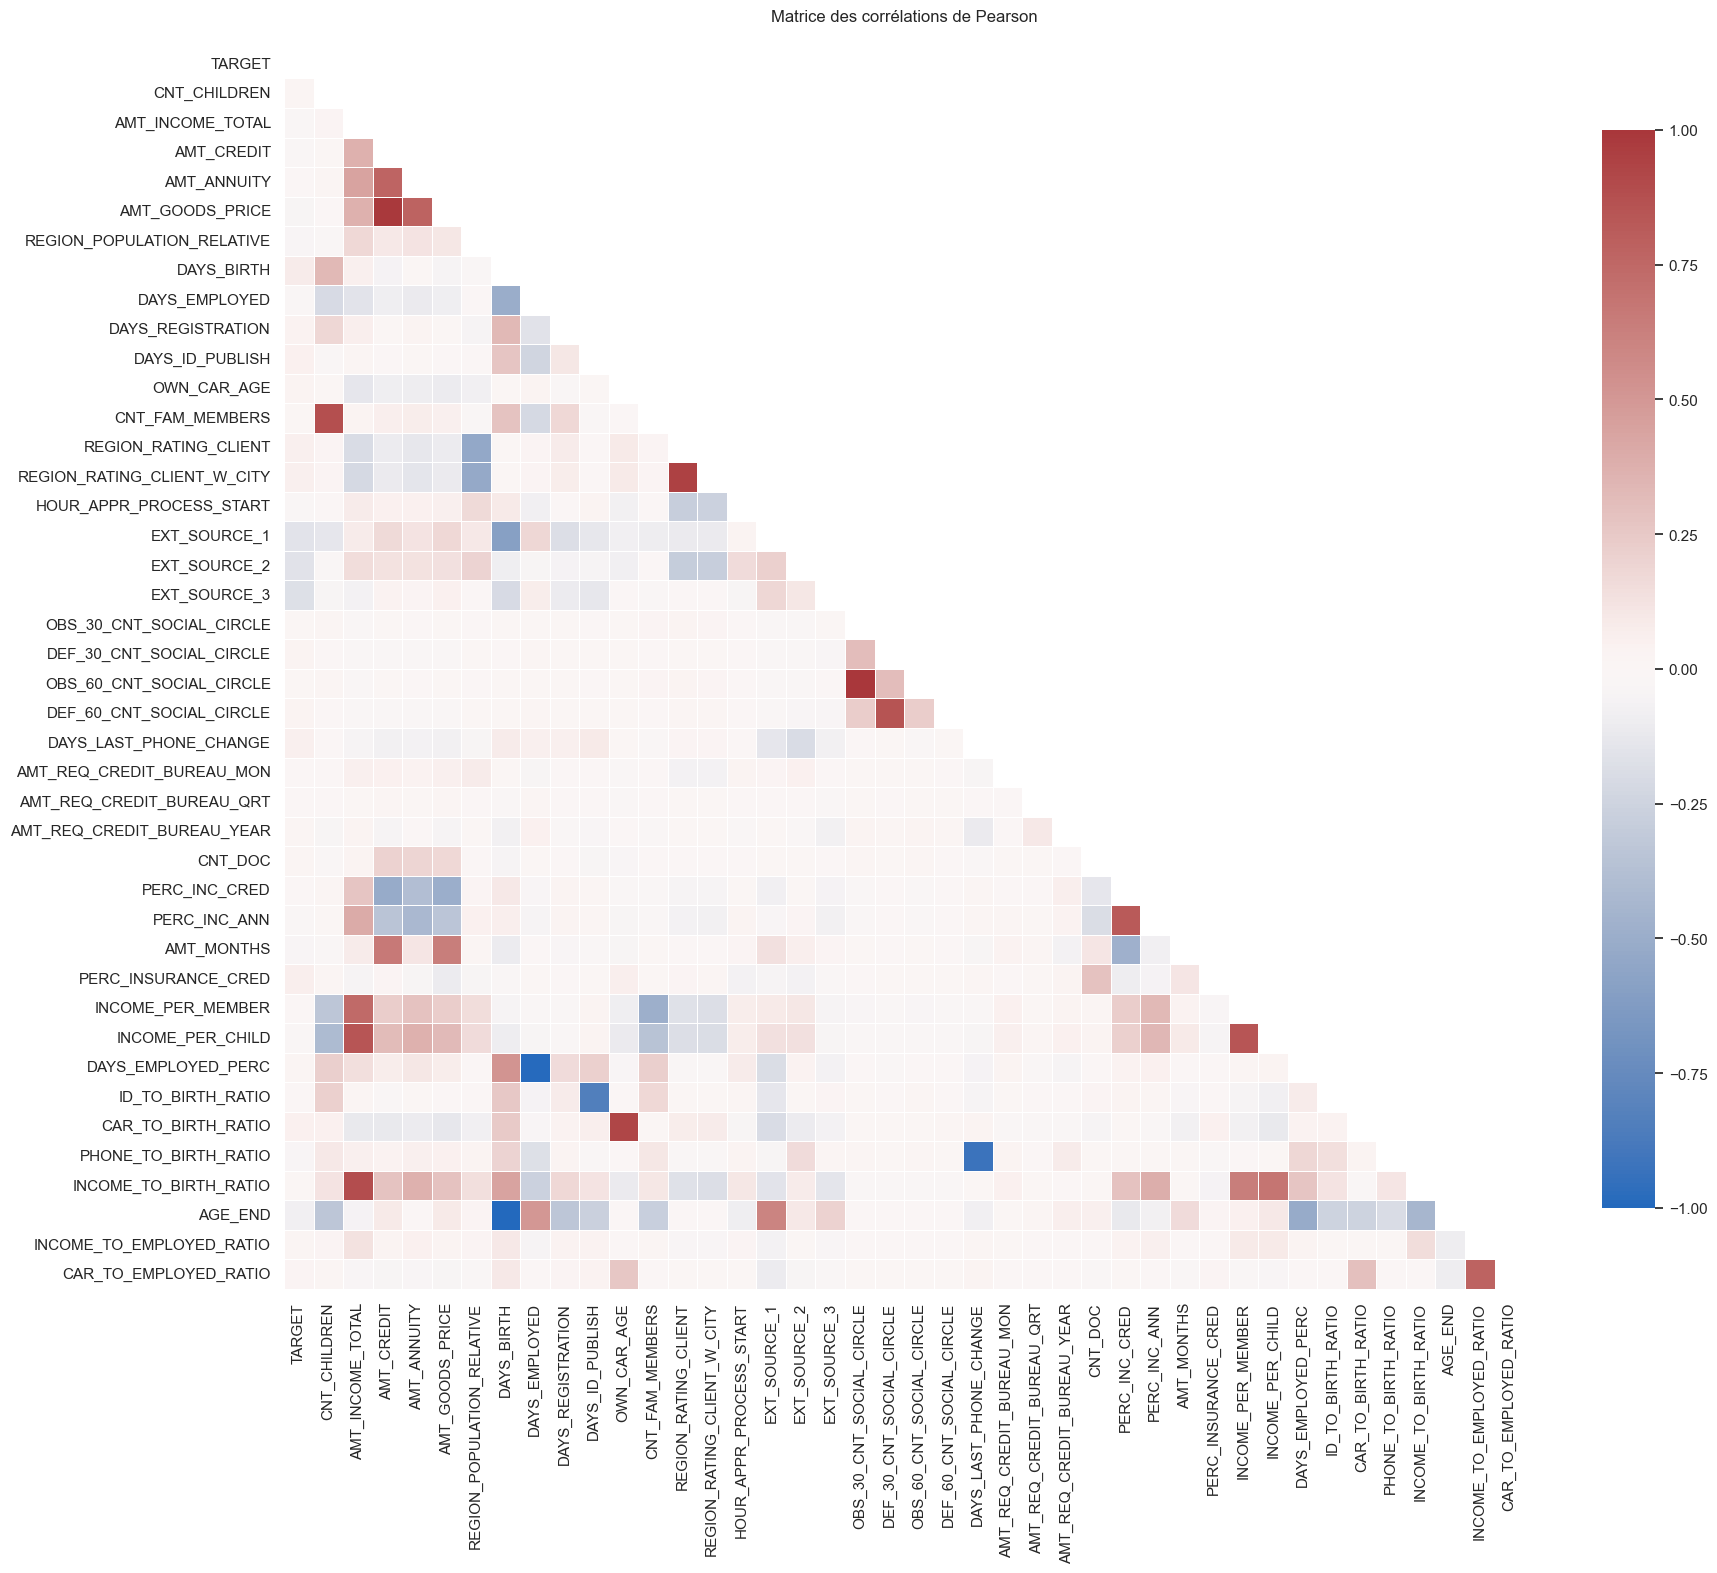

In [144]:
correlation = train[interval_cols].corr()
# # Heatmap de la matrice de corrélation

sns.set_style("whitegrid")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, annot=False, cmap="vlag", vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.7})

plt.title("Matrice des corrélations de Pearson")
plt.show()

In [145]:
abs(train[interval_cols].corr()['TARGET'].sort_values()).sort_values(ascending=False)

TARGET                         1.000000
EXT_SOURCE_3                   0.179047
EXT_SOURCE_2                   0.160431
EXT_SOURCE_1                   0.155385
AGE_END                        0.079559
DAYS_BIRTH                     0.078377
PERC_INSURANCE_CRED            0.068052
REGION_RATING_CLIENT_W_CITY    0.060675
REGION_RATING_CLIENT           0.058667
DAYS_LAST_PHONE_CHANGE         0.055553
DAYS_ID_PUBLISH                0.051457
CAR_TO_BIRTH_RATIO             0.048787
DAYS_REGISTRATION              0.042025
AMT_GOODS_PRICE                0.039668
OWN_CAR_AGE                    0.037481
REGION_POPULATION_RELATIVE     0.036879
PHONE_TO_BIRTH_RATIO           0.034294
DEF_30_CNT_SOCIAL_CIRCLE       0.032614
AMT_MONTHS                     0.032294
DEF_60_CNT_SOCIAL_CIRCLE       0.031544
CAR_TO_EMPLOYED_RATIO          0.030569
AMT_CREDIT                     0.030453
INCOME_PER_CHILD               0.024684
HOUR_APPR_PROCESS_START        0.023971
DAYS_EMPLOYED                  0.022440


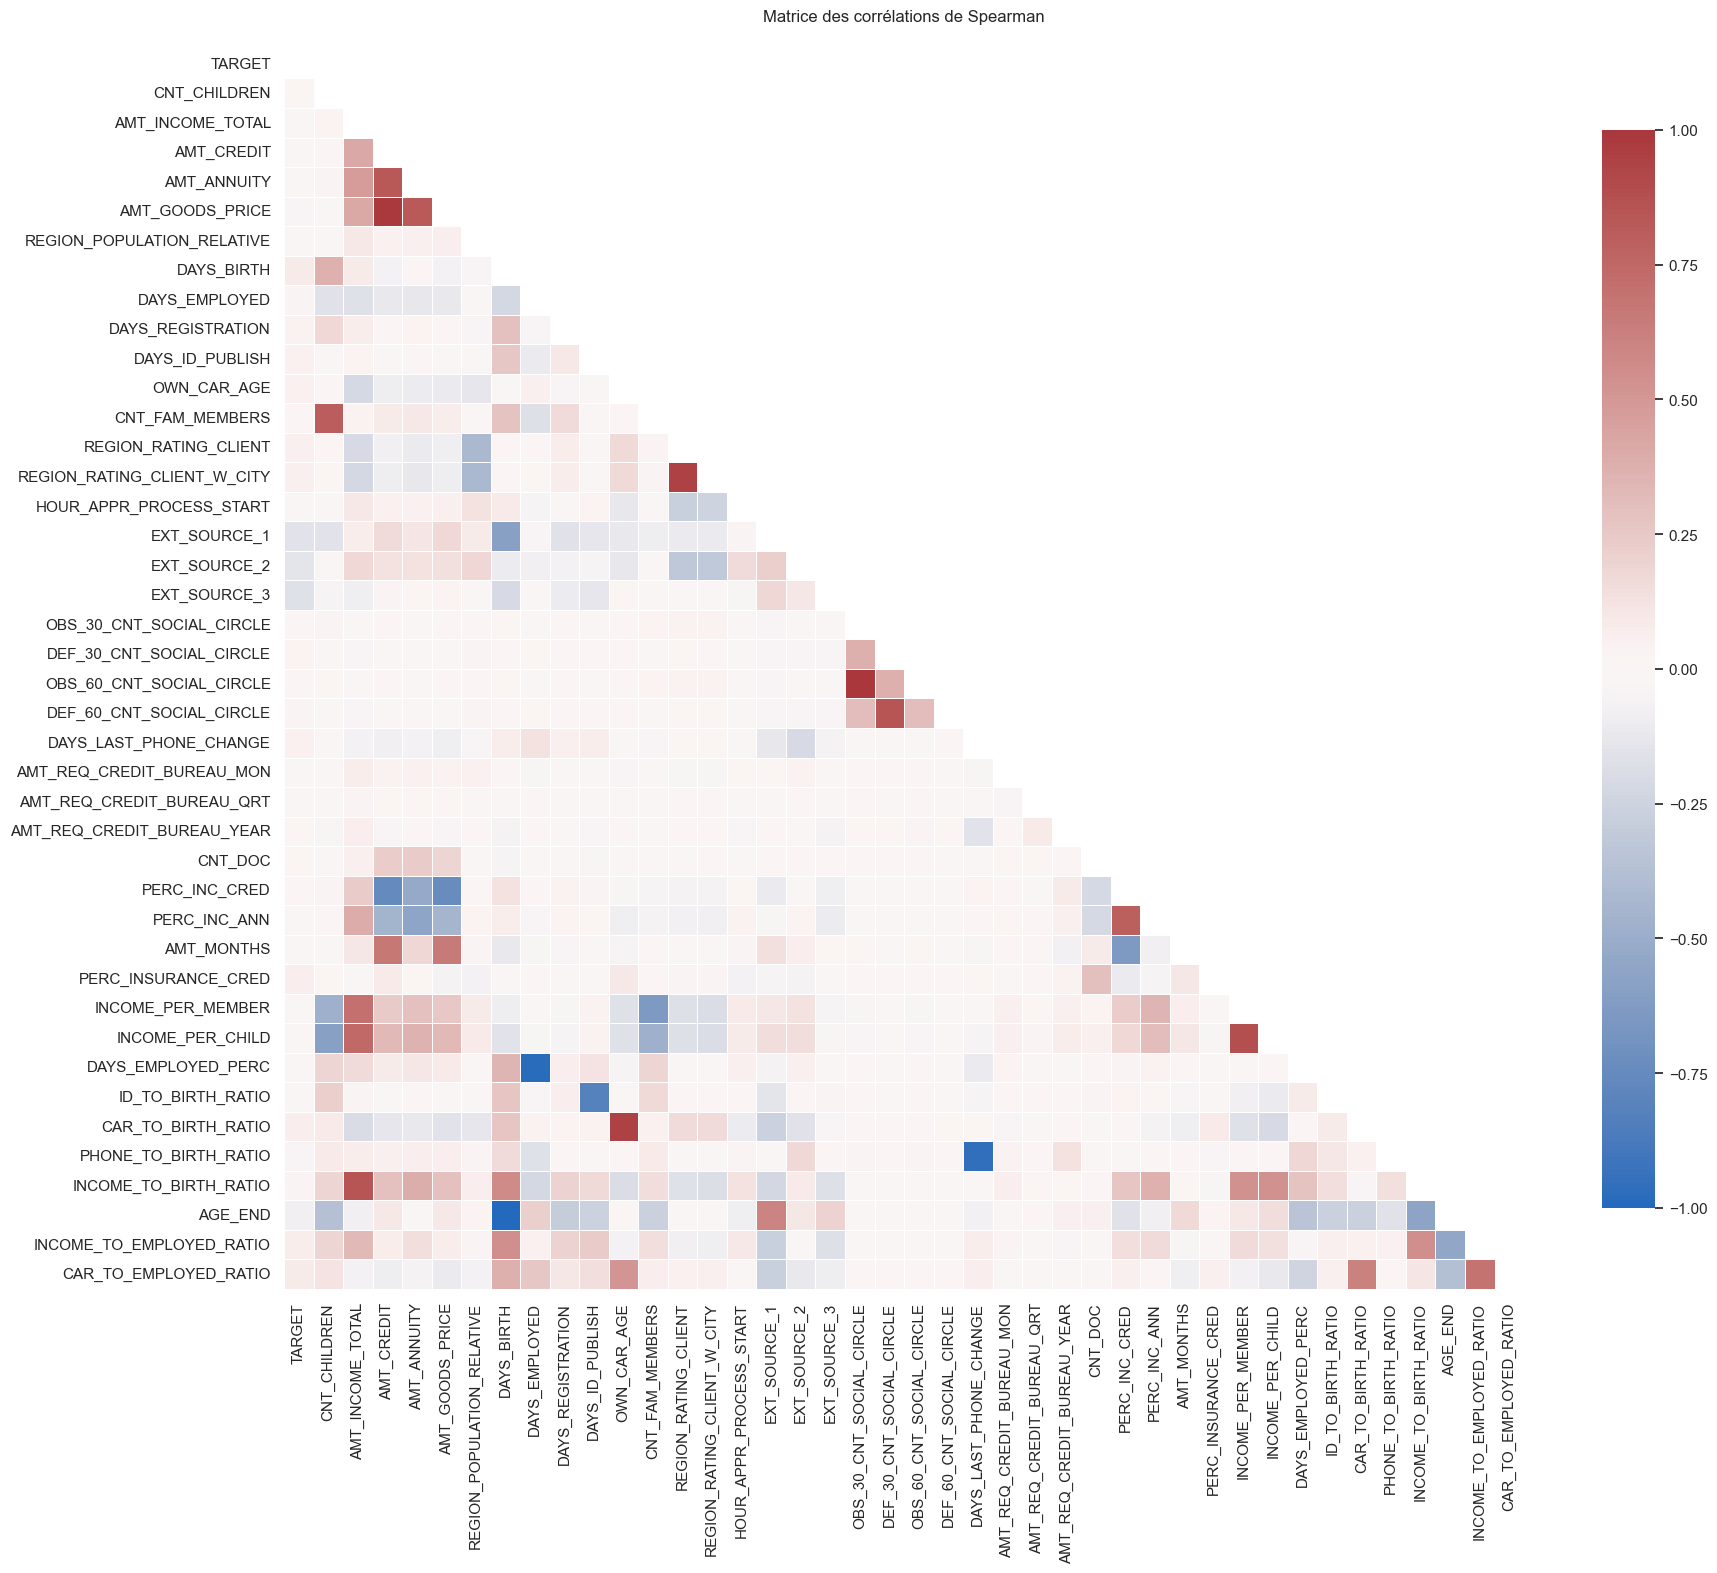

In [146]:
correlation = train[interval_cols].corr(method='spearman')
# # Heatmap de la matrice de corrélation

sns.set_style("whitegrid")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, annot=False, cmap="vlag", vmin=-1, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.7})

plt.title("Matrice des corrélations de Spearman")
plt.show()

In [147]:
abs(train[interval_cols].corr(method='spearman')['TARGET']).sort_values(ascending=False)

TARGET                         1.000000
EXT_SOURCE_3                   0.166436
EXT_SOURCE_1                   0.151205
EXT_SOURCE_2                   0.147278
CAR_TO_EMPLOYED_RATIO          0.081616
AGE_END                        0.079699
DAYS_BIRTH                     0.078457
INCOME_TO_EMPLOYED_RATIO       0.072193
CAR_TO_BIRTH_RATIO             0.066509
PERC_INSURANCE_CRED            0.066416
REGION_RATING_CLIENT_W_CITY    0.060719
REGION_RATING_CLIENT           0.058680
DAYS_LAST_PHONE_CHANGE         0.054018
OWN_CAR_AGE                    0.052796
DAYS_ID_PUBLISH                0.052537
DAYS_REGISTRATION              0.040222
PHONE_TO_BIRTH_RATIO           0.036171
DEF_30_CNT_SOCIAL_CIRCLE       0.032180
AMT_GOODS_PRICE                0.031575
DEF_60_CNT_SOCIAL_CIRCLE       0.030881
AMT_MONTHS                     0.030445
REGION_POPULATION_RELATIVE     0.030304
DAYS_EMPLOYED                  0.025070
INCOME_PER_CHILD               0.024839
INCOME_TO_BIRTH_RATIO          0.024658


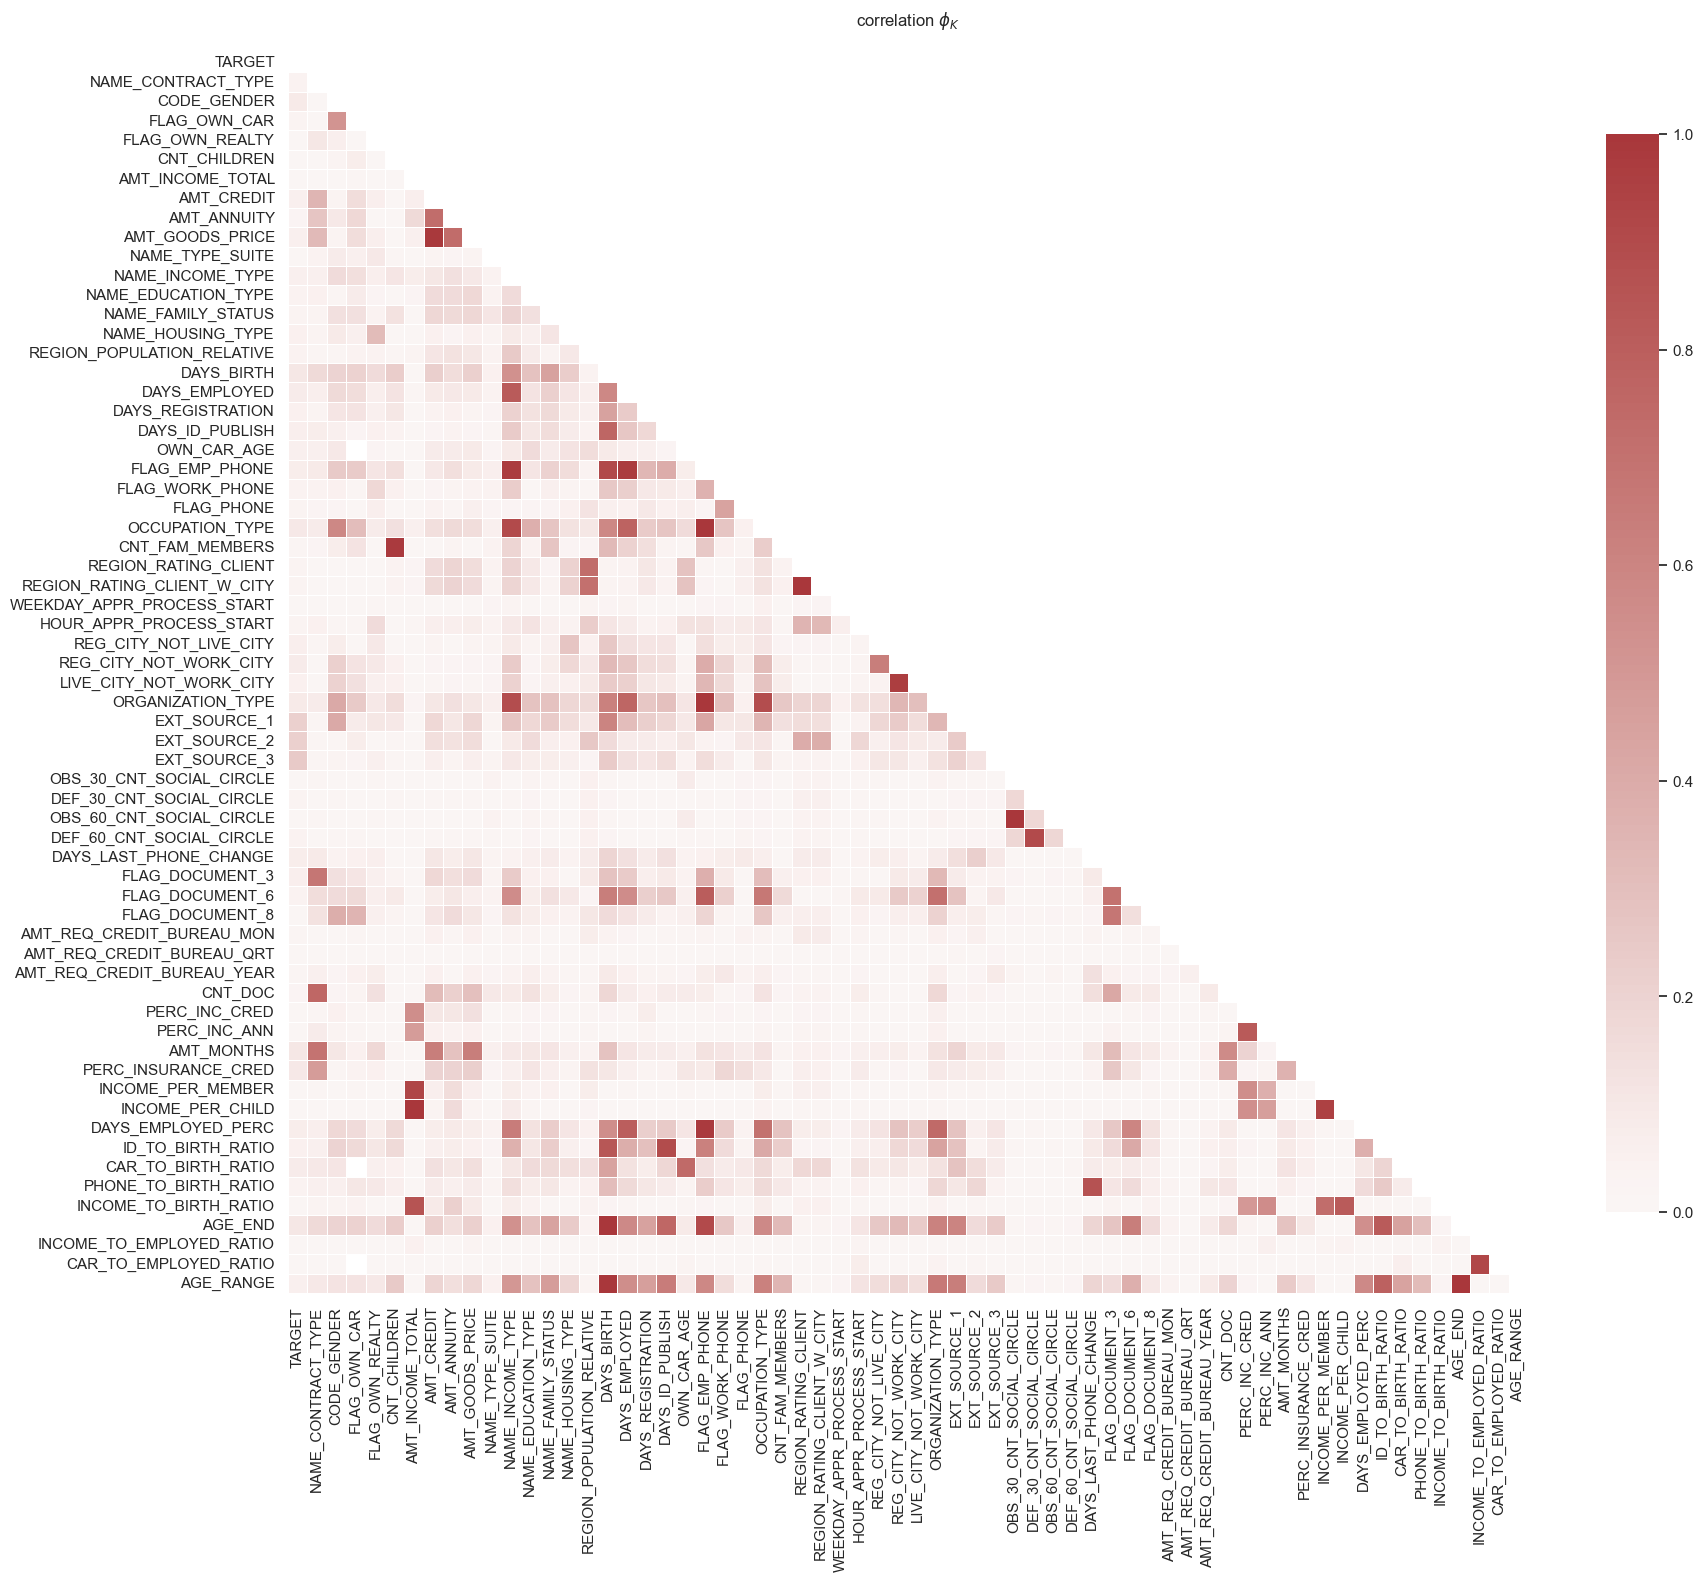

In [148]:
import phik

correlation = train.drop(columns='SK_ID_CURR').phik_matrix(interval_cols=interval_cols)
# # Heatmap de la matrice de corrélation

sns.set_style("whitegrid")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Set up the matplotlib figure
plt.subplots(figsize=(20, 20))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, annot=False, cmap="vlag", vmin=0, vmax=1, center=0, square=True, linewidths=.5,
            cbar_kws={"shrink": 0.7})

plt.title(r"correlation $\phi_K$")
plt.show()

In [149]:
train.drop(columns='SK_ID_CURR').phik_matrix(interval_cols=interval_cols)['TARGET'].sort_values(ascending=False)

TARGET                   1.000000
EXT_SOURCE_3             0.247877
EXT_SOURCE_1             0.217948
EXT_SOURCE_2             0.213949
AMT_MONTHS               0.105577
                           ...   
INCOME_TO_BIRTH_RATIO    0.003065
INCOME_PER_CHILD         0.000000
INCOME_PER_MEMBER        0.000000
AMT_INCOME_TOTAL         0.000000
PERC_INC_ANN             0.000000
Name: TARGET, Length: 64, dtype: float64

<br>

---

### <span style='background :#e3e33d' > 3.5 Feature engineering supplémentaire </span>

In [150]:
abs(train[interval_cols].corr()['EXT_SOURCE_1']).sort_values(ascending=False)

EXT_SOURCE_1                   1.000000
AGE_END                        0.602806
DAYS_BIRTH                     0.600577
EXT_SOURCE_2                   0.213841
CAR_TO_BIRTH_RATIO             0.199035
DAYS_EMPLOYED_PERC             0.195009
EXT_SOURCE_3                   0.186976
DAYS_EMPLOYED                  0.183650
DAYS_REGISTRATION              0.181401
AMT_GOODS_PRICE                0.175501
AMT_CREDIT                     0.168558
TARGET                         0.155385
INCOME_TO_BIRTH_RATIO          0.154903
AMT_MONTHS                     0.140212
ID_TO_BIRTH_RATIO              0.138906
CNT_CHILDREN                   0.138473
INCOME_PER_CHILD               0.135746
DAYS_LAST_PHONE_CHANGE         0.133212
DAYS_ID_PUBLISH                0.132117
AMT_ANNUITY                    0.119146
REGION_RATING_CLIENT           0.114875
REGION_RATING_CLIENT_W_CITY    0.114846
CAR_TO_EMPLOYED_RATIO          0.104988
REGION_POPULATION_RELATIVE     0.099543
CNT_FAM_MEMBERS                0.096642


In [151]:
abs(train[interval_cols].corr()['EXT_SOURCE_2']).sort_values(ascending=False)

EXT_SOURCE_2                   1.000000
REGION_RATING_CLIENT           0.292500
REGION_RATING_CLIENT_W_CITY    0.287922
EXT_SOURCE_1                   0.213841
REGION_POPULATION_RELATIVE     0.198519
DAYS_LAST_PHONE_CHANGE         0.196134
PHONE_TO_BIRTH_RATIO           0.163647
TARGET                         0.160431
HOUR_APPR_PROCESS_START        0.156683
AMT_INCOME_TOTAL               0.149371
AMT_GOODS_PRICE                0.139469
INCOME_PER_CHILD               0.134832
AMT_CREDIT                     0.131420
AMT_ANNUITY                    0.125878
EXT_SOURCE_3                   0.109095
INCOME_PER_MEMBER              0.108894
CAR_TO_BIRTH_RATIO             0.106456
AGE_END                        0.094635
DAYS_BIRTH                     0.091819
INCOME_TO_BIRTH_RATIO          0.081150
OWN_CAR_AGE                    0.080761
AMT_MONTHS                     0.064263
PERC_INSURANCE_CRED            0.063927
DAYS_REGISTRATION              0.059892
AMT_REQ_CREDIT_BUREAU_MON      0.051964


In [152]:
abs(train[interval_cols].corr()['EXT_SOURCE_3']).sort_values(ascending=False)

EXT_SOURCE_3                   1.000000
AGE_END                        0.205719
DAYS_BIRTH                     0.205651
EXT_SOURCE_1                   0.186976
TARGET                         0.179047
INCOME_TO_BIRTH_RATIO          0.142548
DAYS_ID_PUBLISH                0.131475
EXT_SOURCE_2                   0.109095
DAYS_REGISTRATION              0.107720
PERC_INC_ANN                   0.076284
DAYS_LAST_PHONE_CHANGE         0.075431
DAYS_EMPLOYED                  0.072650
AMT_REQ_CREDIT_BUREAU_YEAR     0.071288
DAYS_EMPLOYED_PERC             0.069953
AMT_INCOME_TOTAL               0.068419
CAR_TO_BIRTH_RATIO             0.065899
PERC_INC_CRED                  0.058639
INCOME_PER_MEMBER              0.053267
AMT_GOODS_PRICE                0.047481
AMT_CREDIT                     0.043360
CNT_CHILDREN                   0.042851
INCOME_PER_CHILD               0.042800
HOUR_APPR_PROCESS_START        0.040606
DEF_30_CNT_SOCIAL_CIRCLE       0.036438
DEF_60_CNT_SOCIAL_CIRCLE       0.034189


In [153]:
train[interval_cols].phik_matrix(interval_cols=interval_cols)['EXT_SOURCE_1'].sort_values(ascending=False)

EXT_SOURCE_1                   1.000000
AGE_END                        0.606510
DAYS_BIRTH                     0.604562
DAYS_EMPLOYED                  0.312242
ID_TO_BIRTH_RATIO              0.283314
CAR_TO_BIRTH_RATIO             0.279429
DAYS_EMPLOYED_PERC             0.277349
EXT_SOURCE_2                   0.238964
DAYS_REGISTRATION              0.225646
TARGET                         0.217948
EXT_SOURCE_3                   0.203853
AMT_MONTHS                     0.194538
AMT_GOODS_PRICE                0.181692
DAYS_ID_PUBLISH                0.180953
AMT_CREDIT                     0.175788
REGION_RATING_CLIENT           0.148869
DAYS_LAST_PHONE_CHANGE         0.148186
REGION_RATING_CLIENT_W_CITY    0.146007
CNT_FAM_MEMBERS                0.140349
AMT_ANNUITY                    0.108855
PHONE_TO_BIRTH_RATIO           0.105870
OWN_CAR_AGE                    0.096918
REGION_POPULATION_RELATIVE     0.096841
CNT_CHILDREN                   0.095297
PERC_INSURANCE_CRED            0.083936


In [154]:
train[interval_cols].phik_matrix(interval_cols=interval_cols)['EXT_SOURCE_2'].sort_values(ascending=False)

EXT_SOURCE_2                   1.000000
REGION_RATING_CLIENT           0.394513
REGION_RATING_CLIENT_W_CITY    0.388119
REGION_POPULATION_RELATIVE     0.253774
EXT_SOURCE_1                   0.238964
DAYS_LAST_PHONE_CHANGE         0.222481
TARGET                         0.213949
HOUR_APPR_PROCESS_START        0.185602
PHONE_TO_BIRTH_RATIO           0.179870
AGE_END                        0.163998
DAYS_BIRTH                     0.160891
CAR_TO_BIRTH_RATIO             0.155326
AMT_GOODS_PRICE                0.151558
AMT_CREDIT                     0.145756
AMT_ANNUITY                    0.127793
EXT_SOURCE_3                   0.124912
OWN_CAR_AGE                    0.103071
AMT_MONTHS                     0.091851
DAYS_EMPLOYED                  0.080724
DAYS_REGISTRATION              0.078737
PERC_INSURANCE_CRED            0.075755
DAYS_ID_PUBLISH                0.064283
AMT_REQ_CREDIT_BUREAU_MON      0.058130
DAYS_EMPLOYED_PERC             0.056831
CNT_DOC                        0.039561


In [155]:
train[interval_cols].phik_matrix(interval_cols=interval_cols)['EXT_SOURCE_3'].sort_values(ascending=False)

EXT_SOURCE_3                   1.000000
TARGET                         0.247877
DAYS_BIRTH                     0.236613
AGE_END                        0.235800
EXT_SOURCE_1                   0.203853
DAYS_ID_PUBLISH                0.148969
DAYS_EMPLOYED                  0.135485
EXT_SOURCE_2                   0.124912
DAYS_REGISTRATION              0.116501
DAYS_EMPLOYED_PERC             0.114899
DAYS_LAST_PHONE_CHANGE         0.100278
AMT_MONTHS                     0.096066
AMT_REQ_CREDIT_BUREAU_YEAR     0.088415
CAR_TO_BIRTH_RATIO             0.084268
ID_TO_BIRTH_RATIO              0.082621
AMT_GOODS_PRICE                0.068183
AMT_CREDIT                     0.066250
PERC_INSURANCE_CRED            0.062275
HOUR_APPR_PROCESS_START        0.049568
REGION_RATING_CLIENT_W_CITY    0.045052
OWN_CAR_AGE                    0.044187
REGION_RATING_CLIENT           0.043795
PHONE_TO_BIRTH_RATIO           0.041308
AMT_ANNUITY                    0.035615
CNT_FAM_MEMBERS                0.033602


In [157]:
train['EXT_SOURCE_MEAN'] = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
train['EXT_SOURCE_PROD'] = train['EXT_SOURCE_1'] * train['EXT_SOURCE_2'] * train['EXT_SOURCE_3']

train['EXT_SOURCE_1_TO_BIRTH_RATIO'] = train['EXT_SOURCE_1'] / (train['DAYS_BIRTH'] / -365)
train['EXT_SOURCE_1_TO_EMPLOY_RATIO'] = train['EXT_SOURCE_1'] / (train['DAYS_EMPLOYED'] / -365)
train['EXT_SOURCE_1*DAYS_BIRTH'] = train['EXT_SOURCE_1'] * (train['DAYS_BIRTH'] / -365)
train['EXT_SOURCE_1*DAYS_EMPLOYED'] = train['EXT_SOURCE_1'] * (train['DAYS_EMPLOYED'] / -365)

train['EXT_SOURCE_2_TO_BIRTH_RATIO'] = train['EXT_SOURCE_2'] / (train['DAYS_BIRTH'] / -365)
train['EXT_SOURCE_2_TO_EMPLOY_RATIO'] = train['EXT_SOURCE_2'] / (train['DAYS_EMPLOYED'] / -365)
train['EXT_SOURCE_2*DAYS_BIRTH'] = train['EXT_SOURCE_2'] * (train['DAYS_BIRTH'] / -365)
train['EXT_SOURCE_2*DAYS_EMPLOYED'] = train['EXT_SOURCE_2'] * (train['DAYS_EMPLOYED'] / -365)
train['EXT_SOURCE_2_TO_REGION_RATIO'] = train['EXT_SOURCE_2'] / train['REGION_RATING_CLIENT']
train['EXT_SOURCE_2*REGION_RATING_CLIENT'] = train['EXT_SOURCE_2'] * train['REGION_RATING_CLIENT']

train['EXT_SOURCE_3_TO_BIRTH_RATIO'] = train['EXT_SOURCE_3'] / (train['DAYS_BIRTH'] / -365)
train['EXT_SOURCE_3*DAYS_BIRTH'] = train['EXT_SOURCE_3'] * (train['DAYS_BIRTH'] / -365)

train['EXT_SOURCE_1_TO_EXT_SOURCE_2_RATIO'] = train['EXT_SOURCE_1'] / train['EXT_SOURCE_2']
train['EXT_SOURCE_2_TO_EXT_SOURCE_3_RATIO'] = train['EXT_SOURCE_2'] / train['EXT_SOURCE_3']
train['EXT_SOURCE_1_TO_EXT_SOURCE_3_RATIO'] = train['EXT_SOURCE_1'] / train['EXT_SOURCE_3']

train['EXT_SOURCE_1*EXT_SOURCE_2'] = train['EXT_SOURCE_1'] * train['EXT_SOURCE_2']
train['EXT_SOURCE_2*EXT_SOURCE_3'] = train['EXT_SOURCE_2'] * train['EXT_SOURCE_3']
train['EXT_SOURCE_1*EXT_SOURCE_3'] = train['EXT_SOURCE_1'] * train['EXT_SOURCE_3']

<br>

---

### <span style='background :#e3e33d' > 3.6 Information Value </span>

In [158]:
IV = iv_woe(train.drop(columns='SK_ID_CURR')[list_var_categ + ['AGE_RANGE','TARGET']], 'TARGET', bins=10).sort_values(by='IV', ascending=False)
IV

,Variable,IV
0,OCCUPATION_TYPE,0.096247
0,AGE_RANGE,0.077368
0,ORGANIZATION_TYPE,0.074429
0,NAME_INCOME_TYPE,0.058479
0,NAME_EDUCATION_TYPE,0.050057
0,CODE_GENDER,0.038764
0,NAME_FAMILY_STATUS,0.021794
0,NAME_HOUSING_TYPE,0.015767
0,NAME_CONTRACT_TYPE,0.013781
0,FLAG_OWN_CAR,0.006613


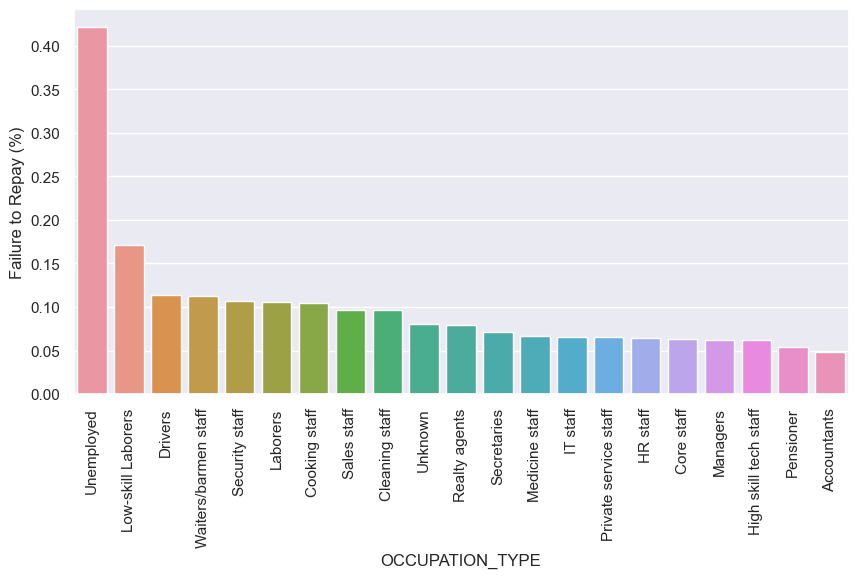

In [159]:
compare_target_categ(train, 'OCCUPATION_TYPE', figsize=(10, 5), rotate=True, order=True)

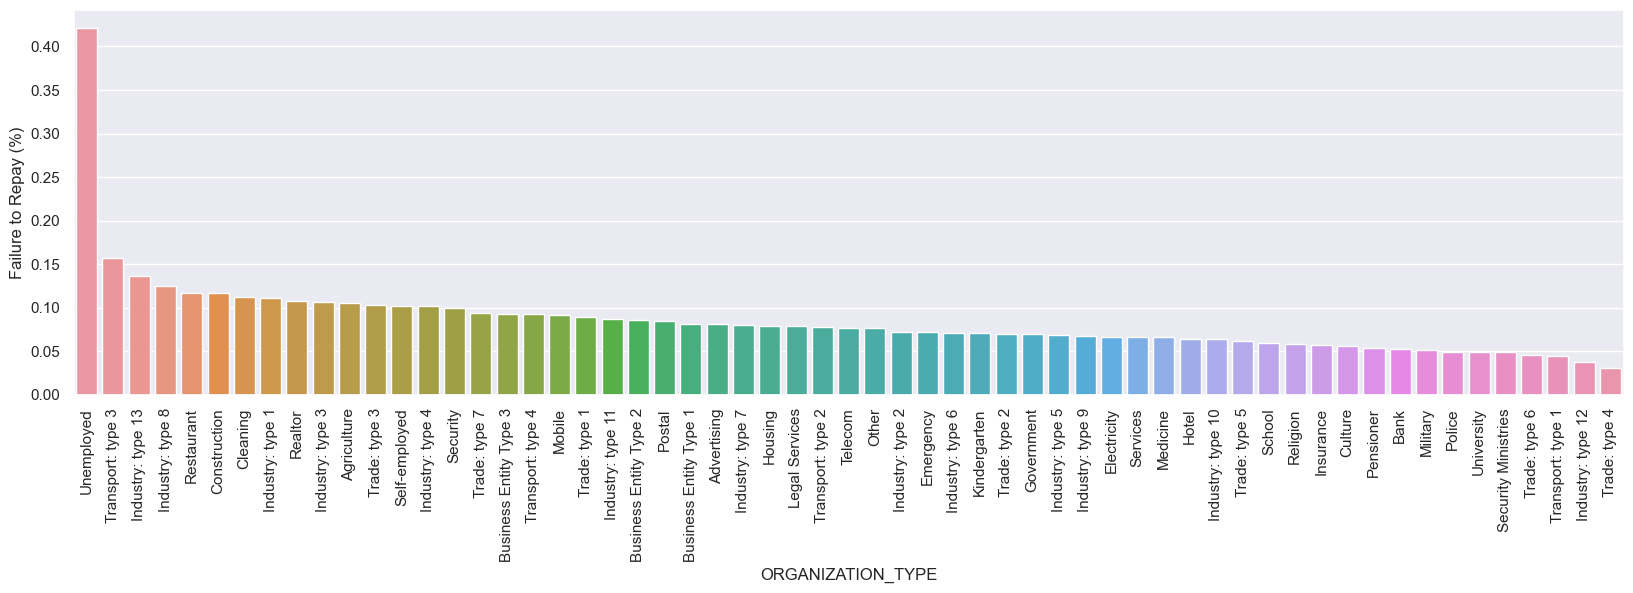

In [160]:
compare_target_categ(train, 'ORGANIZATION_TYPE', figsize=(20, 5), rotate=True, order=True)

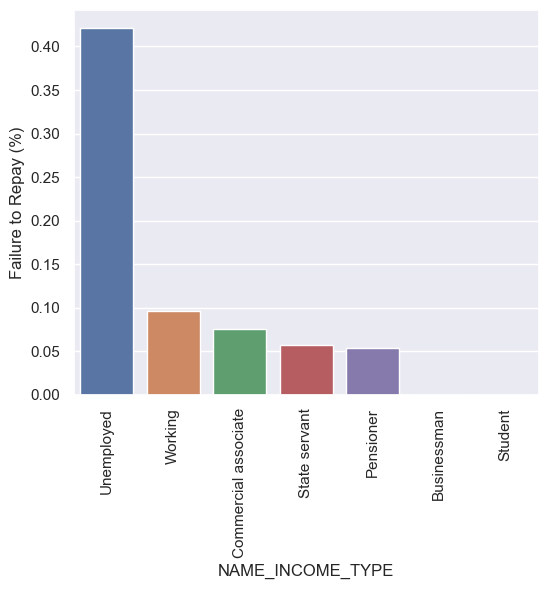

In [161]:
compare_target_categ(train, 'NAME_INCOME_TYPE', figsize=(6, 5), rotate=True, order=True)

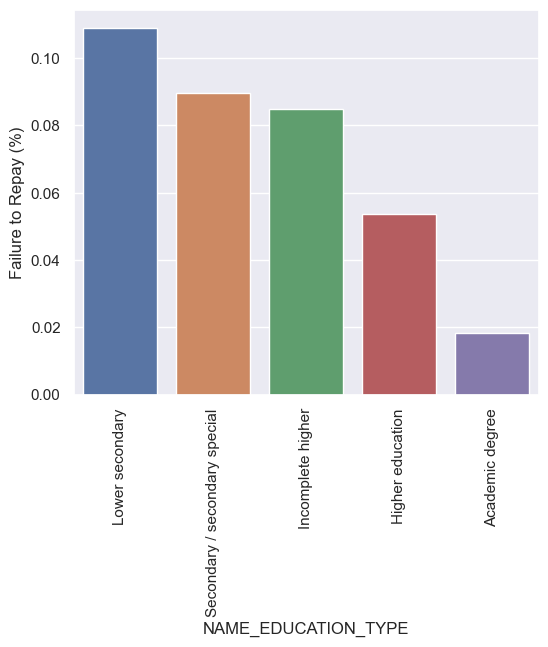

In [162]:
compare_target_categ(train, 'NAME_EDUCATION_TYPE', figsize=(6, 5), rotate=True, order=True)

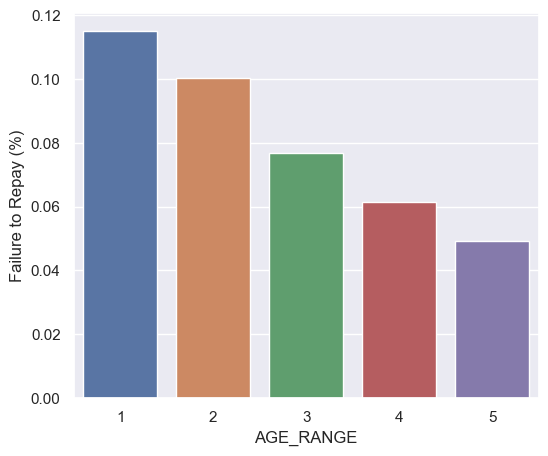

In [163]:
compare_target_categ(train, 'AGE_RANGE', figsize=(6, 5))

In [164]:
IV = iv_woe(train[list(set(train.columns) - set(list_var_categ))], 'TARGET', bins=10).sort_values(by='IV', ascending=False)
IV

,Variable,IV
0,EXT_SOURCE_MEAN,0.607830
0,EXT_SOURCE_2*EXT_SOURCE_3,0.489612
0,EXT_SOURCE_3*DAYS_BIRTH,0.341407
0,EXT_SOURCE_2*DAYS_BIRTH,0.335724
0,EXT_SOURCE_3,0.329645
...,...,...
0,CNT_CHILDREN,0.001668
0,OBS_60_CNT_SOCIAL_CIRCLE,0.001465
0,OBS_30_CNT_SOCIAL_CIRCLE,0.001451
0,FLAG_DOCUMENT_8,0.000940


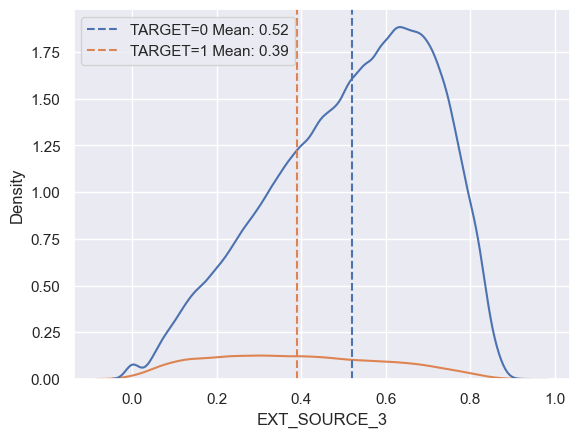

In [165]:
compare_target(train, 'EXT_SOURCE_3')

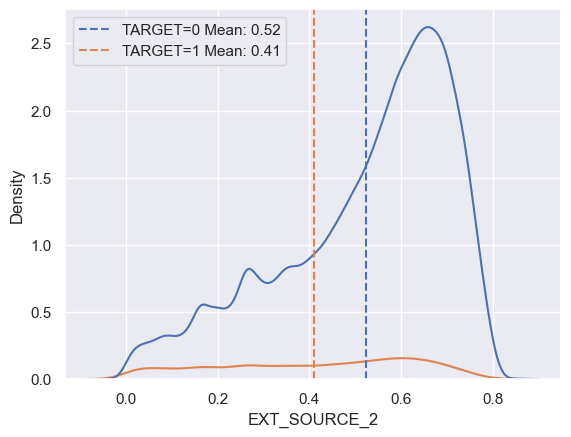

In [166]:
compare_target(train, 'EXT_SOURCE_2')

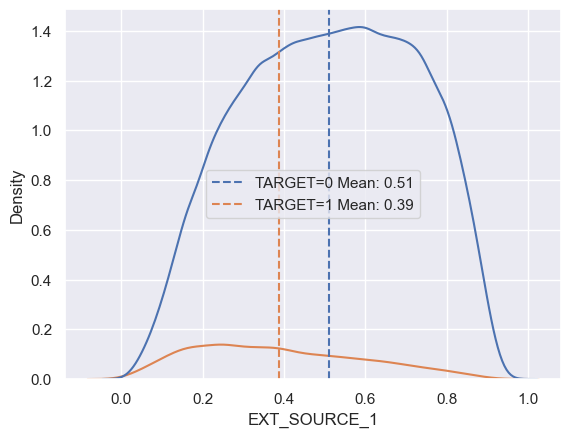

In [167]:
compare_target(train, 'EXT_SOURCE_1')

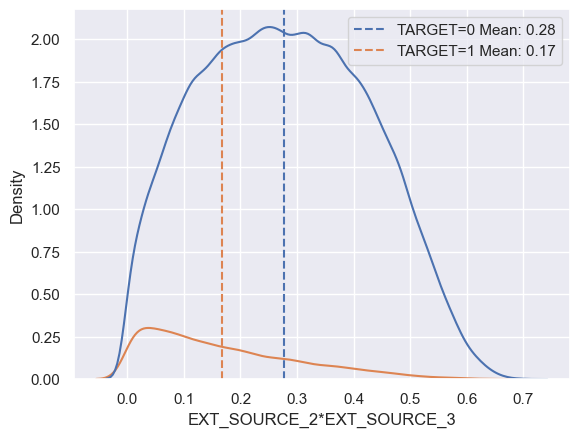

In [168]:
compare_target(train, 'EXT_SOURCE_2*EXT_SOURCE_3')